In [257]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/ABCNlayer.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/k_abcobservables")

abcplotbands! (generic function with 2 methods)

In [35]:
using CairoMakie
CairoMakie.disable_mime!("svg", "pdf", "text/html")
function plotmap(xs,ys,Zb)
    # Create the density plot
    vis = 250
    fig = Figure(size=(1.23*600,600))
    ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky")
    # # heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
    # cmap = cgrad([:red, :white, :blue])
    cmap = cgrad([:red,:black])
    hm = heatmap!(ax, xs, ys, real(Zb), colormap=cmap)#, colorrange=(-1, 1.0).*vis)
    # Colorbar(fig[1,2], ax)  # Add a colorbar
    cb = Colorbar(fig[1, 2], hm)
    xlims!(ax, as[1], bs[1])
    ylims!(ax, as[2], bs[2])
    return fig
end
function struct_to_dict(obj)
    return Dict(name => getfield(obj, name) for name in fieldnames(typeof(obj)))
end

struct_to_dict (generic function with 1 method)

### Preliminar tests

In [534]:
hpv = abc_pentalayer(0.02, 2, params5LG()) 
hnv = abc_pentalayer(0.02, 2,  params5LG()) 


2×2 Matrix{ComplexF64}:
 0.28521+0.0im      1.39344+1.31491im
 1.39344-1.31491im  0.28521+0.0im

1


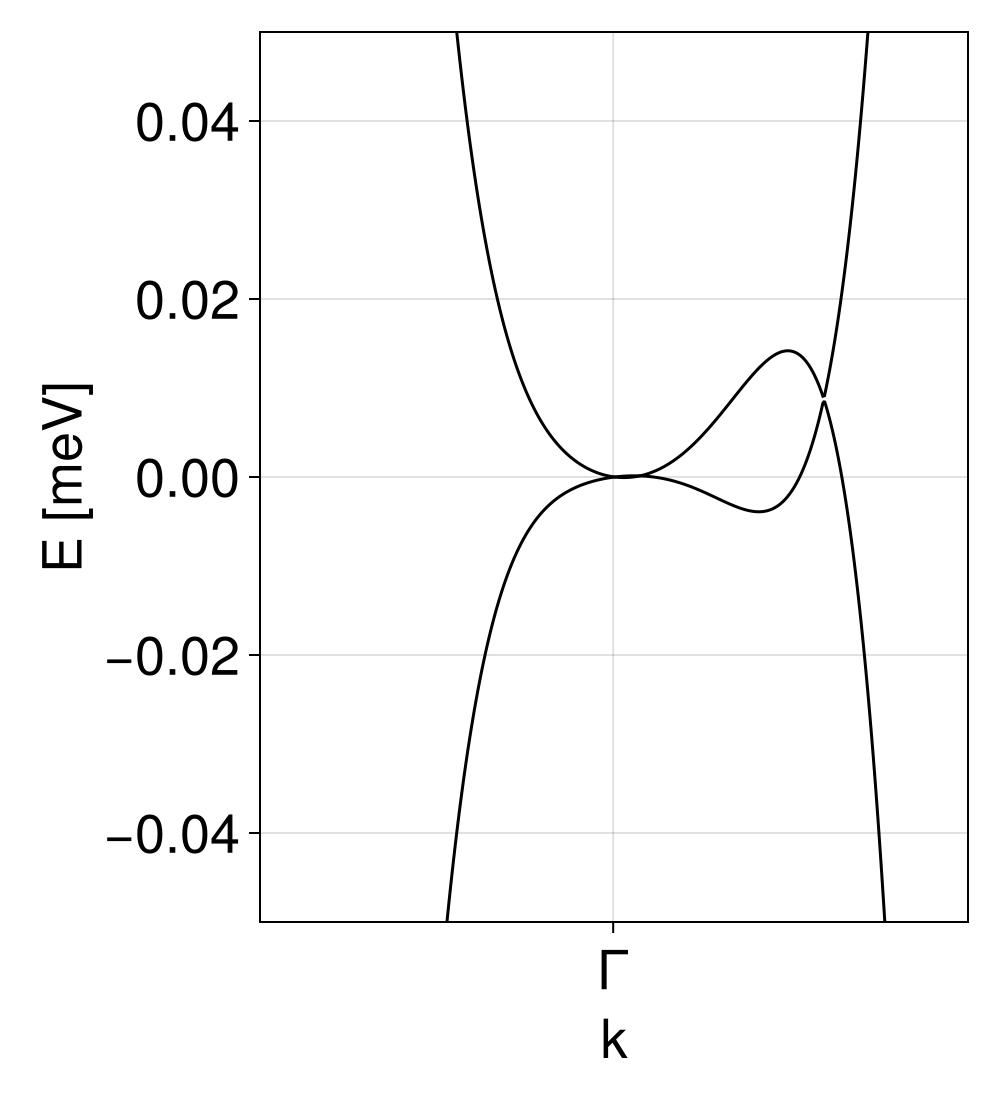

In [26]:
fig = abcplotbandsk(1, 200,  params5LG())

In [96]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/ABCNlayer.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/k_abcobservables")
fig = abcplotbandsk(200, Params5LG(1, 3160, 390, -20, 315, 0*44, 3, 2))
abcplotbandsk(fig, 200, Params5LG(-1, 3160, 390, -20, 315, 0*44, 3, 2))

MethodError: MethodError: no method matching Params5LG(::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64, ::Int64)

Closest candidates are:
  Params5LG(::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, ::Any, !Matched::Any)
   @ Main ~/.julia/packages/Parameters/MK0O4/src/Parameters.jl:505


In [80]:
p.γ1

390.0

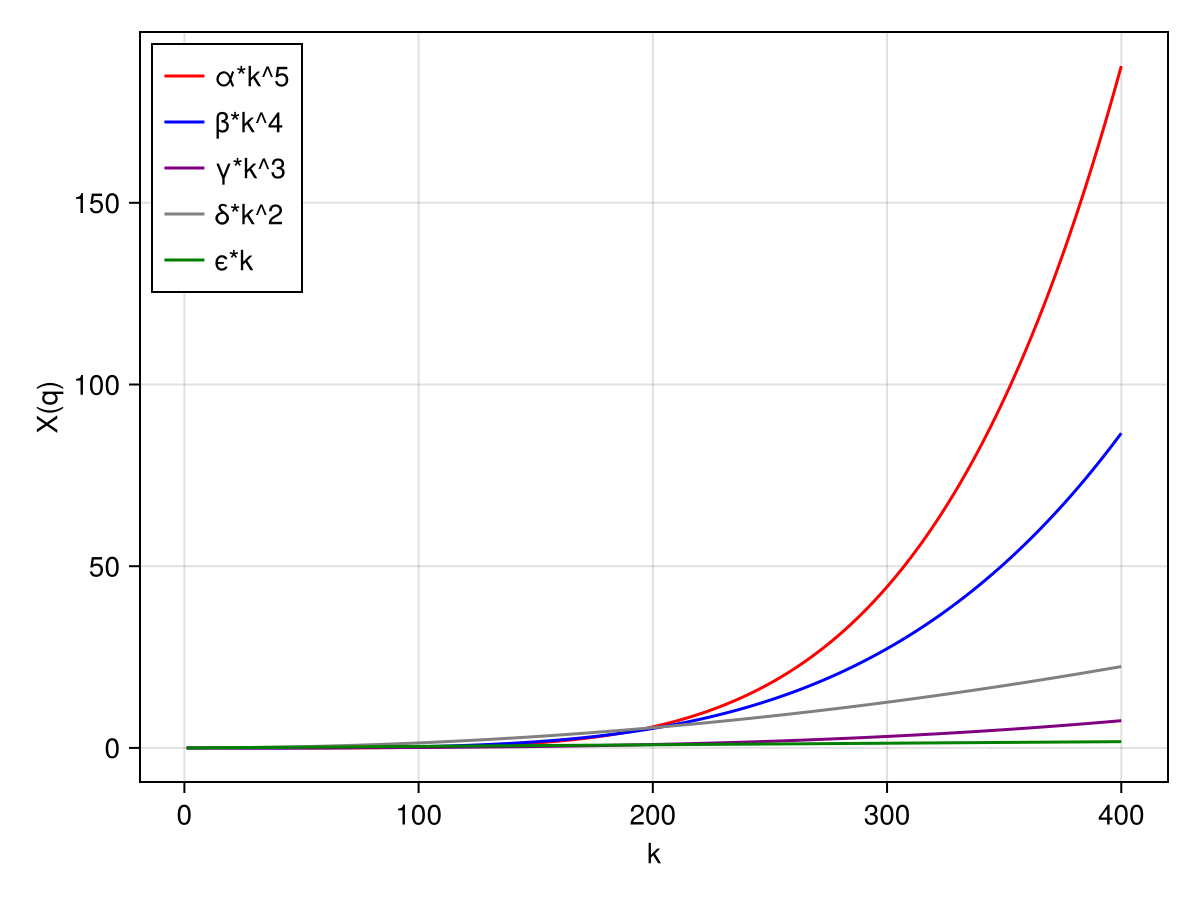

In [94]:
kvects = abcbz_path_gamma_k_m_gamma(1, 200)
fig = Figure()
ax = Axis(fig[1,1], xlabel = "k", ylabel = "X(q)")
p = params5LG()
falpha(k) = falpha(norm([k[1],k[2]]), atan(k[2],k[1]))
fbeta(k) = fbeta(norm(k), atan(k[2],k[1]))
fgamma(k) = fgamma(norm(k), atan(k[2],k[1]))
fdelta(k) = fdelta(norm(k), atan(k[2],k[1]))
fepsilon(k) = fepsilon(norm(k), atan(k[2],k[1]))
falpha(k, θ) =  p.γ0^5/ p.γ1^4 * k^5 * cis(θ)^5
fbeta(k, θ) = -4p.γ0^3*p.γ3/p.γ1^3 * k^4 * cis(1*θ)^2
fgamma(k, θ) = 3p.γ0*p.γ3^2/p.γ1^2 * k^3 * cis(-θ)
fdelta(k, θ) = 3/2 * p.γ2*p.γ0^2/p.γ1^2 * k^2 * cis(θ)^2
fepsilon(k, θ) = p.γ2*p.γ3/p.γ1 * k * cis(-θ)


lines!(ax, [i for i in 1:length(kvects)], 
            [abs(falpha(kvects[i])) for i in 1:length(kvects)], label = "α*k^5", color = :red)
lines!(ax, [i for i in 1:length(kvects)], 
            [abs(fbeta(kvects[i])) for i in 1:length(kvects)], label = "β*k^4", color = :blue)
lines!(ax, [i for i in 1:length(kvects)], 
            [abs(fgamma(kvects[i])) for i in 1:length(kvects)], label = "γ*k^3", color = :purple)
lines!(ax, [i for i in 1:length(kvects)], 
            [abs(fdelta(kvects[i])) for i in 1:length(kvects)], label = "δ*k^2", color = :gray)
lines!(ax, [i for i in 1:length(kvects)], 
            [abs(fepsilon(kvects[i])) for i in 1:length(kvects)], label = "ϵ*k", color = :green)

    # a2 =scatter!(ax, i, abs(fbeta(kvects[i])),  color = :blue)
    # a3 =scatter!(ax, i, abs(fgamma(kvects[i])), color = :gray)
    # a4 =scatter!(ax, i, abs(fdelta(kvects[i])), color = :purple)
    # a5 =scatter!(ax, i, abs(fepsilon(kvects[i])), color = :yellow)
    # scatter!(ax, k, abs(fbeta(k)), label = "β")
    # scatter!(ax, k, abs(fgamma(k)), label = "γ")
    # scatter!(ax, k,abs( fdelta(k)), label = "δ")
    # scatter!(ax, k, abs(fepsilon(k)), label = "ϵ")
# end
axislegend(ax,  halign = :left)
# Legend(fig[1, 2],
#     [a1,a2,a3,a4,a5],
#     ["a line", "some dots", "both together", "rect markers", "df"])
fig



In [167]:
falpha(kvects[4])

1.4426934524411345e-7 + 0.0im

In [20]:
[abs(falpha(kvects[i])) for i in 1:length(kvects)]

20-element Vector{Float64}:
   0.0
   5.937010092350354e-5
   0.0018998432295521132
   0.014426934524411343
   0.06079498334566762
   0.18553156538594842
   0.461661904781163
   0.9978332862213226
   1.945439467061364
   3.505745089431959
   5.9370100923503495
   9.561614123831166
  14.773180952997215
  22.04370288219039
  31.930665159082324
  45.08417038878547
  62.254062945963646
  84.29705338694288
 112.18384286182268
 147.006247526586

In [84]:
kvects = abcbz_path_gamma_k_m_gamma(1, 200)[100]

(0.02645351332287751, 0.0)

### LMC

In [64]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/ABCNlayer.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/k_abcobservables")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/HF_Optics.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/lmc.jl")

k_in_plane_bindependent_conductivity

#### Presets

In [206]:
μlist = collect(-0:0.1:10)
p = Params5LG(1, 0, 3160, 390,-20, 315, 0*44, 2, 1)
T = 2
B = 10
evals = 1280000
Nlist = collect(2:7);
# T = 2 evals 80000 not perfect

6-element Vector{Int64}:
 2
 3
 4
 5
 6
 7

#### Bands

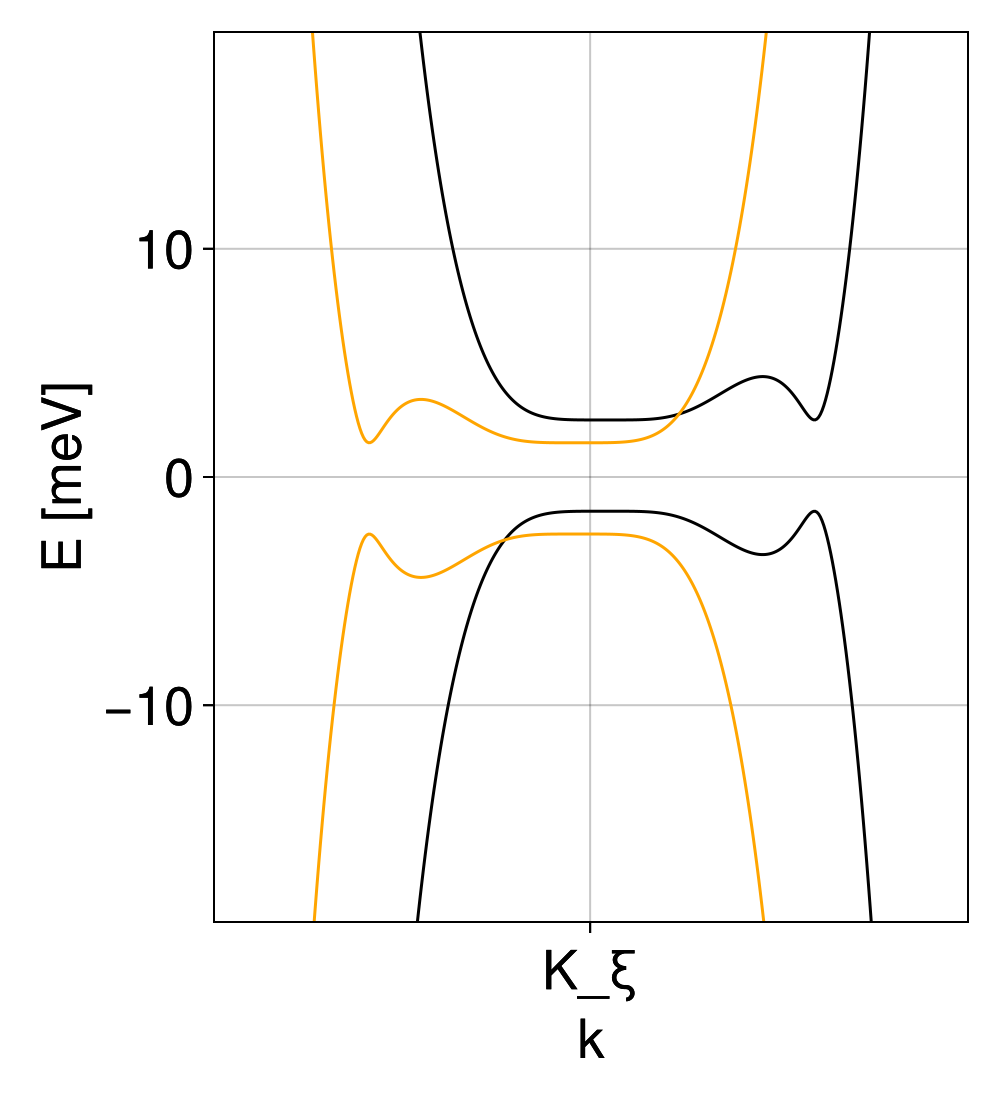

In [176]:
fig = abcplotbandsk(200, Params5LG(p, ξ =1))
abcplotbandsk(fig, 200, Params5LG(p, ξ =-1))

#### N bands

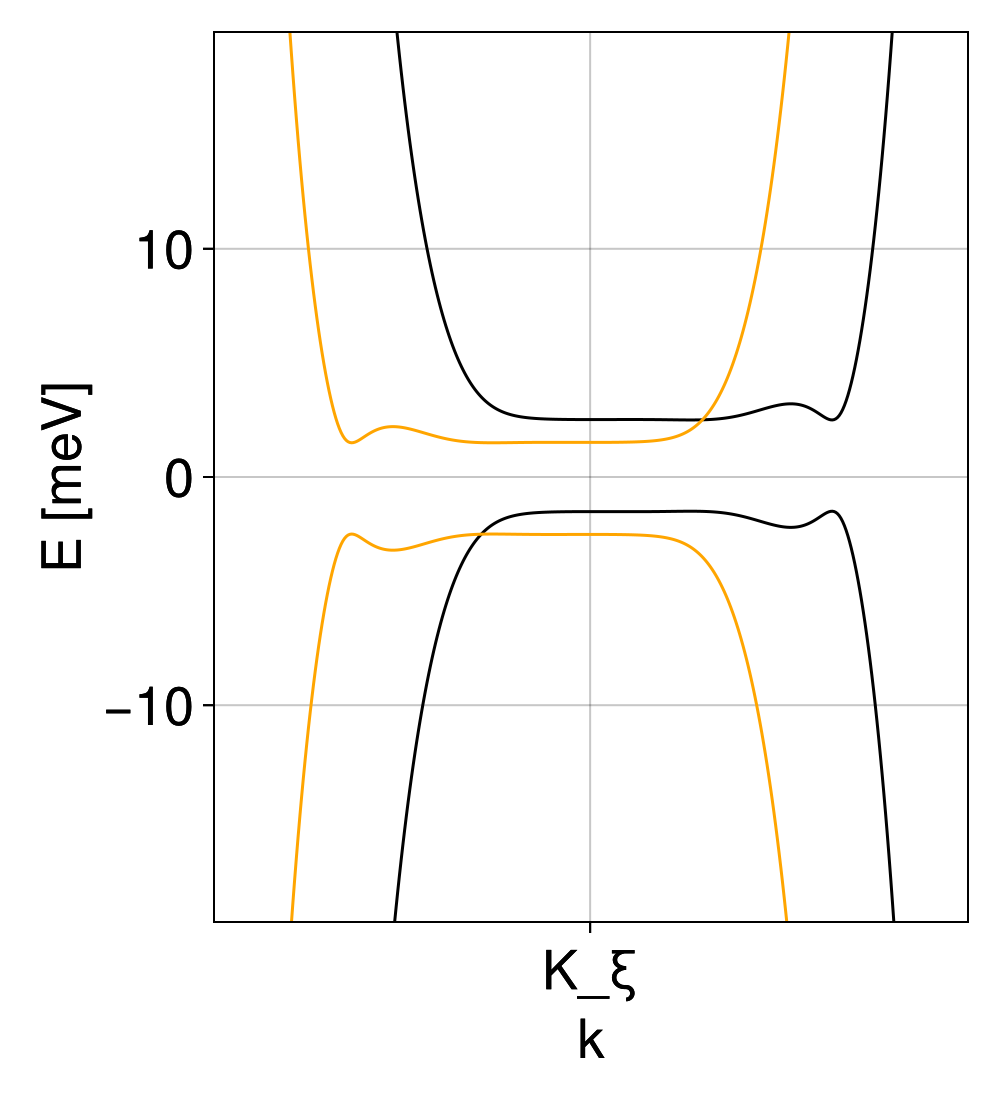

In [11]:
N = 6
fig = abcNplotbandsk(N,200, Params5LG(p, ξ =1))
abcNplotbandsk(fig, N, 200, Params5LG(p, ξ =-1))

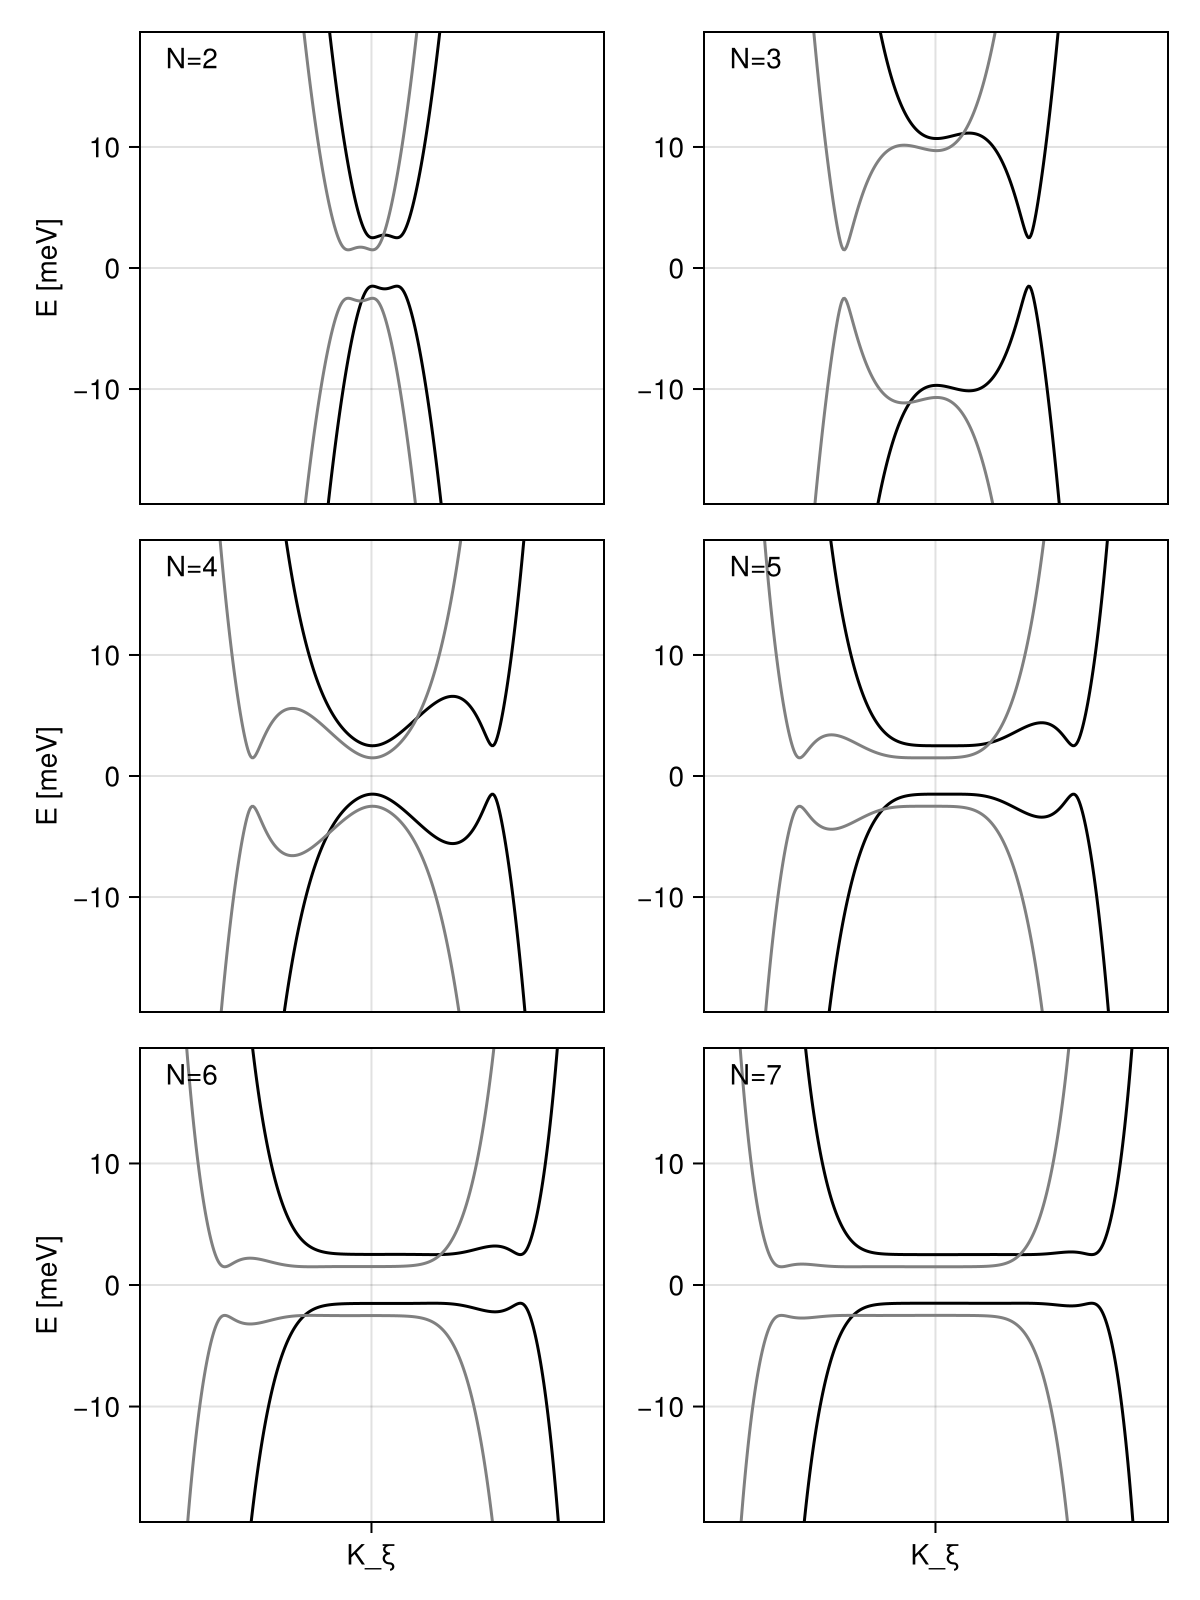

In [216]:
Nlist = [2,3,4,5,6,7]
figbands = Figure(size = (600,800))
ax1 = Axis(figbands[1,1], ylabel = "E [meV]")
abcNplotbandsk(ax1, 2, 200, Params5LG(p, ξ =1))
abcNplotbandsk(ax1, 2, 200, Params5LG(p, ξ =-1), color = :gray)

ax2 = Axis(figbands[2,1], ylabel = "E [meV]")
abcNplotbandsk(ax2, 4, 200, Params5LG(p, ξ =1))
abcNplotbandsk(ax2, 4, 200, Params5LG(p, ξ =-1), color = :gray)

ax3 = Axis(figbands[3,1], ylabel = "E [meV]")
abcNplotbandsk(ax3, 6, 200, Params5LG(p, ξ =1))
abcNplotbandsk(ax3, 6, 200, Params5LG(p, ξ =-1), color = :gray)

ax4 = Axis(figbands[1,2])
abcNplotbandsk(ax4, 3, 200, Params5LG(p, ξ =1))
abcNplotbandsk(ax4, 3, 200, Params5LG(p, ξ =-1), color = :gray)


ax5 = Axis(figbands[2,2])
abcNplotbandsk(ax5, 5, 200, Params5LG(p, ξ =1))
abcNplotbandsk(ax5, 5, 200, Params5LG(p, ξ =-1), color = :gray)

ax6 = Axis(figbands[3,2])
abcNplotbandsk(ax6, 7, 200, Params5LG(p, ξ =1))
abcNplotbandsk(ax6, 7, 200, Params5LG(p, ξ =-1), color = :gray)

hidexdecorations!(ax1,grid=false)
hidexdecorations!(ax2,grid=false)
hidexdecorations!(ax4,grid=false)
hidexdecorations!(ax5,grid=false)
text!(ax1, 30,16,text = "N=2", color = :black, align = (:center, :bottom))
text!(ax2, 30,16,text = "N=4", color = :black, align = (:center, :bottom))
text!(ax3, 30,16,text = "N=6", color = :black, align = (:center, :bottom))
text!(ax4, 30,16,text = "N=3", color = :black, align = (:center, :bottom))
text!(ax5, 30,16,text = "N=5", color = :black, align = (:center, :bottom))
text!(ax6, 30,16,text = "N=7", color = :black, align = (:center, :bottom))


figbands

#### Fermi surface

In [211]:
# FS
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/lmc.jl")
fspv = [magneto_conductivity(:x,:x,:x, Params5LG(p, μ = μ, ξ = 1), T = T, evals = evals,
     Ω_contr = false, omm_contr = false, fermi_surface = true) for μ in μlist];
fsnv = [magneto_conductivity(:x,:x,:x, Params5LG(p, μ = μ, ξ = -1), T = T, evals = evals,
     Ω_contr = false, omm_contr = false, fermi_surface = true) for μ in μlist];

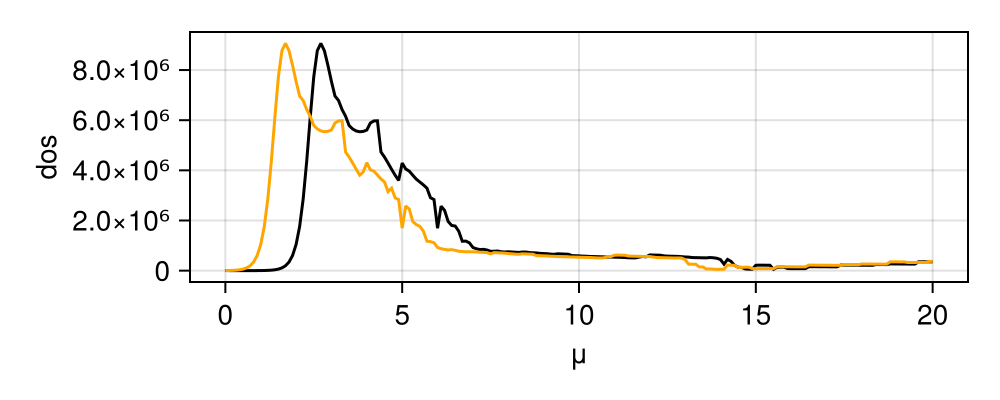

In [212]:
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "dos")
lines!(ax, μlist, -fspv, color = :black)
lines!(ax, μlist, -fsnv, color = :orange)
fig

In [138]:
# lines!(ax, μlist, -fsnv, color = :yellow)
# fig

#### Tests

In [60]:
magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=1, μ = 5), T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false)

-0.005955268924248606

In [62]:
N = 5
Nmagneto_conductivity(N, :x,:x,:x, Params5LG(p, ξ=1, μ = 5), T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false)

-0.005955268924248613

In [39]:
p = Params5LG(1, 0, 3160, 390,-0*20, 0*315, 0*44, 2, 1)
dhxNlg(5, 0.01, 2, p)

2×2 Matrix{ComplexF64}:
     -0.0+0.0im       -0.67241-0.100244im
 -0.67241+0.100244im      -0.0+0.0im

In [48]:
triads = find_triads(N)

5-element Vector{Any}:
 (5, 0, 0)
 (3, 1, 0)
 (1, 2, 0)
 (2, 0, 1)
 (0, 1, 1)

#### LMC

In [64]:
# lmc_pv = [magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals,
#      Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist];

In [65]:
# lines!(ax, μlist, lmc_pv, color = :blue, label ="K+")
# figslmc

In [63]:
# figslmc = Figure() 
# ax = Axis(figslmc[1,1], xlabel = "μ", ylabel = "LMC")
# lines!(ax, μlist, lmc_pv, color = :blue, label ="K+")
# axislegend()
# figslmc

In [124]:
# lines!(ax, μlist, lmcp, color = :orange, label ="K+")
# figslmc

In [299]:
lmc_pv = [magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist];
lmc_nv = [magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=-1, μ = μ), T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist];

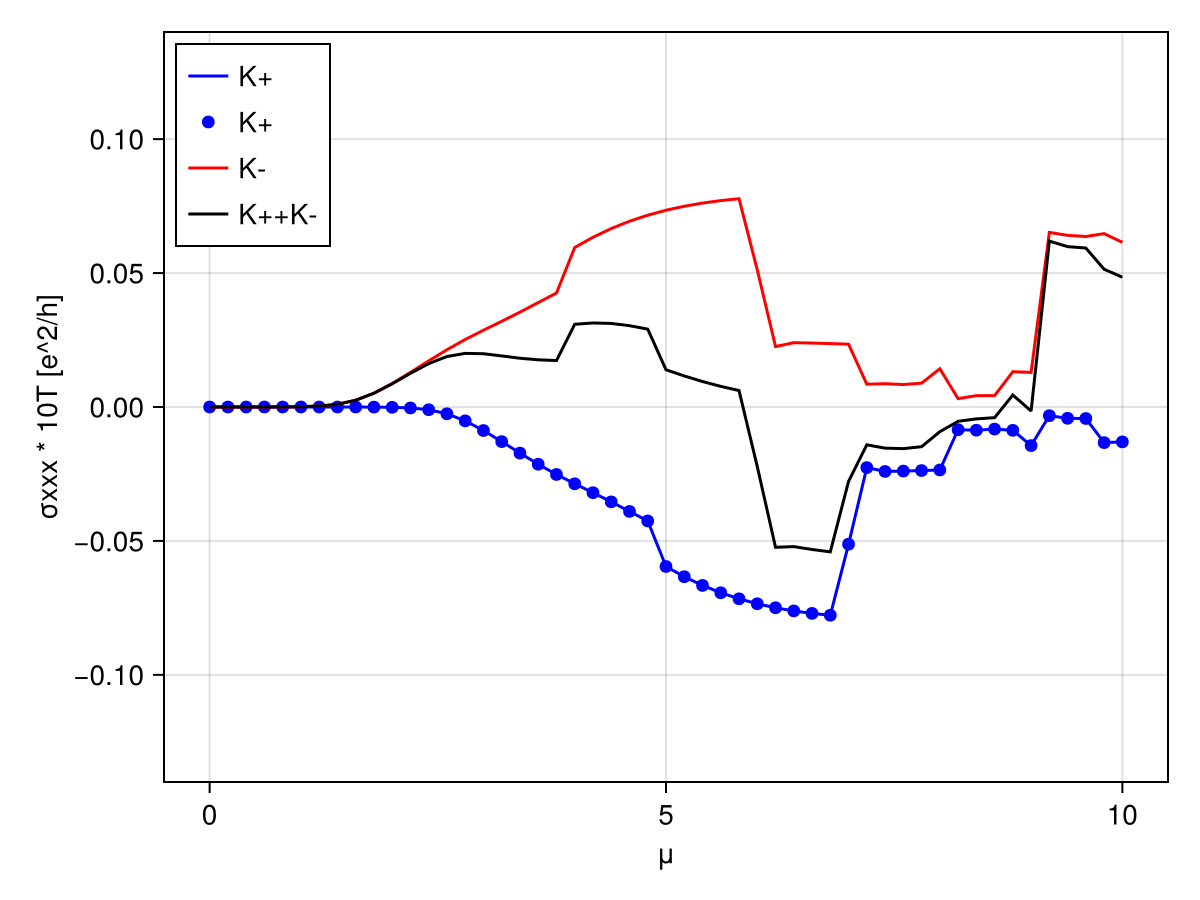

In [302]:
figlmc = Figure() 
ax = Axis(figlmc[1,1], xlabel = "μ", ylabel = "σxxx * 10T [e^2/h]")
lines!(ax, μlist, 10*lmc_pv, color = :blue, label ="K+")
scatter!(ax, μlist, 10*lmc_pv, color = :blue, label ="K+")

lines!(ax, μlist, 10*lmc_nv, color = :red, label ="K-")
lines!(ax,  μlist, 10*(lmc_pv+lmc_nv), color = :black, label ="K++K-")
ylims!(ax, (-1,1) .* 0.14)
axislegend(position = :lt)
figlmc

In [265]:
figlmc

#### N LMC

In [150]:
# Nlmc_pv = [magneto_conductivity(N, :x,:x,:x, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals,
#      Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist] 
# Nlmc_nv = [magneto_conductivity(N, :x,:x,:x, Params5LG(p, ξ=-1, μ = μ), T = T, evals = evals,
#      Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist] 

In [208]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/ABCNlayer.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/k_abcobservables")
# include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/HF_Optics.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/lmc.jl")
#val = Nk_linear_magnetorresistance_withshift(4, :x, :x, :x, p, [0.001,0.01], 10, T = 1,τ = 1e-15)

k_in_plane_bindependent_conductivity

In [200]:
# Nmat_lmc_pv = magneto_conductivity_withshift(5, :x,:x,:x, Params5LG(p, ξ=1, μ = 3), B = B, T = T, evals = evals,
     # Ω_contr = true, omm_contr = true, fermi_surface = false)

-0.01576705907070761

In [137]:
ang_to_m

1.0e-10

In [87]:
# Nmat_lmc_pv = [[magneto_conductivity_withshift(N, :x,:x,:x, Params5LG(p, ξ=1, μ = μ), B = B, T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist] for N in Nlist]

6-element Vector{Vector{Float64}}:
 [-1.6278643304038052e12, -4.0145524454090344e11, -1.784318748231676e11, -4.0145524454617346e11, -1.627864330402396e12, -6.919581167762266e12, -2.9432186990643375e13, -1.2412753973926852e14, -5.051046793484883e14, -2.2267931632713428e15  …  2.8982203660389844e14, 6.987251773540998e13, 1.6487357516583873e13, 3.862146794951966e12, 8.668343281930667e11, 1.061731669608449e15, -2.607431923413208e10, -1.1121842676977263e11, -4.7436511886627704e11, -2.0226945758174216e12]
 [-8.500945495371773e-6, -3.626097730313039e-5, -0.00015467202744612189, -0.0006597570681645302, -0.0028142088532762443, -0.012004072183555979, -0.051203644256987826, -0.2184103148586267, -0.9316341898874704, -3.973906929849385  …  -2.5360411865659688e14, -7.543673185208575e14, -1.1320593453816752e15, -6.241017770451242e14, -2.031421444157806e11, -8.664414222206821e11, -3.6946245162176567e12, -1.5737678387280709e13, -6.673445779148757e13, -2.7763547188347978e14]
 [-2.6957348961169497e12, -6

In [ ]:
# figNlmc = Figure() 
# ax = Axis(figNlmc[1,1], xlabel = "μ", ylabel = "σxxx * 10T [e^2/h]")
# lines!(ax, μlist, 10*Nlmc_pv, color = :blue, label ="K+")
# scatter!(ax, μlist, 10*Nlmc_pv, color = :blue, label ="K+")

# lines!(ax, μlist, 10*Nlmc_nv, color = :red, label ="K-")
# lines!(ax,  μlist, 10*(Nlmc_pv+Nlmc_nv), color = :black, label ="K++K-")
# ylims!(ax, (-1,1) .* 0.14)
# axislegend(position = :lt)
# figNlmc

In [209]:
Nmat_lmc_pv = [[magneto_conductivity(N, :x,:x,:x, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist] for N in Nlist]
Nmat_lmc_nv = [[magneto_conductivity(N, :x,:x,:x, Params5LG(p, ξ=-1, μ = μ), T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist] for N in Nlist]

6-element Vector{Vector{Float64}}:
 [6.935977639648298e-8, 1.240245871637687e-7, 2.216067337506656e-7, 3.9584299894940154e-7, 7.069049250989392e-7, 1.262003920916536e-6, 2.2517880618382776e-6, 4.014062216821477e-6, 7.143555710205154e-6, 1.2675479150132909e-5  …  0.0011572889814341328, 0.0011516149524145518, 0.001145991474209005, 0.0011404191662463445, 0.0011348978338562422, 0.0011294276975655326, 0.0011240086908623564, 0.0011186409361997832, 0.0011133243502129085, 0.0011080585078385022]
 [5.137065721084172e-9, 9.185643164521834e-9, 1.6412970708030602e-8, 2.931808087248481e-8, 5.2358799802784606e-8, 9.347996048911534e-8, 1.6681588380479208e-7, 2.9743148963625424e-7, 5.295205768865743e-7, 9.402136073084241e-7  …  0.0009440311850382591, 0.0009463139331345747, 0.000955691144961342, 0.0009937185650328191, 0.0010080004179394393, 0.001025776382380667, 0.0010478952525919253, 0.0010749774653589612, 0.0011071098299728064, 0.001143561143878217]
 [1.6988820305632787e-8, 3.036071803059819e-8, 5.423

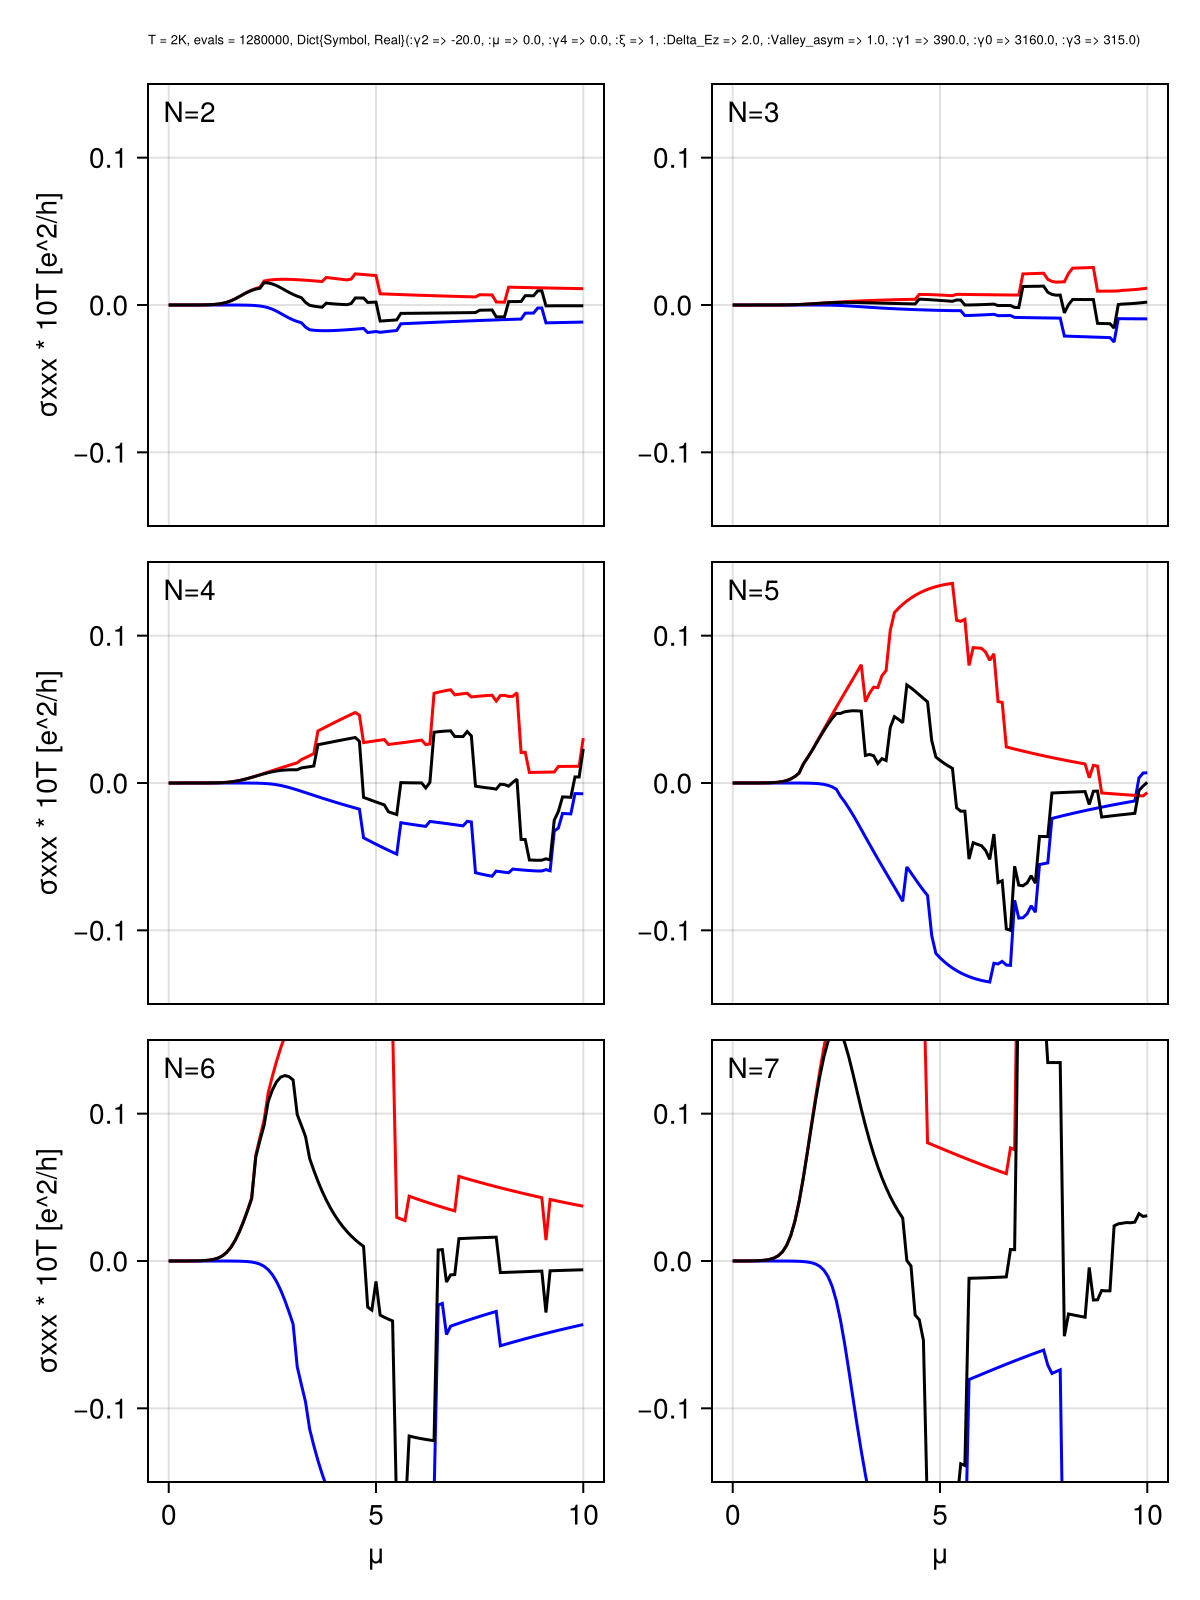

In [210]:


figNmatlmc = Figure(size = (600,800))
Label(figNmatlmc[0, 1:2],  "T = $(T)K, evals = $(evals), $(struct_to_dict(p))", fontsize = 6.5, halign = :left)

ax1 = Axis(figNmatlmc[1,1], xlabel = "μ", ylabel = "σxxx * 10T [e^2/h]")
lines!(ax1, μlist, 10*Nmat_lmc_pv[1], color = :blue, label ="K+")
lines!(ax1, μlist, 10*Nmat_lmc_nv[1], color = :red, label ="K-")
lines!(ax1,  μlist, 10*(Nmat_lmc_pv[1]+Nmat_lmc_nv[1]), color = :black, label ="K++K-")

ax2 = Axis(figNmatlmc[2,1], xlabel = "μ", ylabel = "σxxx * 10T [e^2/h]")
lines!(ax2, μlist, 10*Nmat_lmc_pv[3], color = :blue, label ="K+")
lines!(ax2, μlist, 10*Nmat_lmc_nv[3], color = :red, label ="K-")
lines!(ax2,  μlist, 10*(Nmat_lmc_pv[3]+Nmat_lmc_nv[3]), color = :black, label ="K++K-")

ax3 = Axis(figNmatlmc[3,1], xlabel = "μ", ylabel = "σxxx * 10T [e^2/h]")
lines!(ax3, μlist, 10*Nmat_lmc_pv[5], color = :blue, label ="K+")
lines!(ax3, μlist, 10*Nmat_lmc_nv[5], color = :red, label ="K-")
lines!(ax3,  μlist, 10*(Nmat_lmc_pv[5]+Nmat_lmc_nv[5]), color = :black, label ="K++K-")

ax4 = Axis(figNmatlmc[1,2])
lines!(ax4, μlist, 10*Nmat_lmc_pv[2], color = :blue, label ="K+")
lines!(ax4, μlist, 10*Nmat_lmc_nv[2], color = :red, label ="K-")
lines!(ax4,  μlist, 10*(Nmat_lmc_pv[2]+Nmat_lmc_nv[2]), color = :black, label ="K++K-")

ax5 = Axis(figNmatlmc[2,2])
lines!(ax5, μlist, 10*Nmat_lmc_pv[4], color = :blue, label ="K+")
lines!(ax5, μlist, 10*Nmat_lmc_nv[4], color = :red, label ="K-")
lines!(ax5,  μlist, 10*(Nmat_lmc_pv[4]+Nmat_lmc_nv[4]), color = :black, label ="K++K-")

ax6 = Axis(figNmatlmc[3,2],xlabel = "μ")
lines!(ax6, μlist, 10*Nmat_lmc_pv[6], color = :blue, label ="K+")
lines!(ax6, μlist, 10*Nmat_lmc_nv[6], color = :red, label ="K-")
lines!(ax6,  μlist, 10*(Nmat_lmc_pv[6]+Nmat_lmc_nv[6]), color = :black, label ="K++K-")

hidexdecorations!(ax1,grid = false)
hidexdecorations!(ax2,grid = false)
hidexdecorations!(ax4,grid = false)
hidexdecorations!(ax5,grid = false)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]
    ylims!(ax, (-1,1) .* 0.15) 
end


text!(ax1, 0.5, 0.12,text = "N=2", color = :black, align = (:center, :bottom))
text!(ax2, 0.5, 0.12,text = "N=4", color = :black, align = (:center, :bottom))
text!(ax3,  0.5, 0.12,text = "N=6", color = :black, align = (:center, :bottom))
text!(ax4,  0.5, 0.12,text = "N=3", color = :black, align = (:center, :bottom))
text!(ax5,  0.5, 0.12,text = "N=5", color = :black, align = (:center, :bottom))
text!(ax6,  0.5, 0.12,text = "N=7", color = :black, align = (:center, :bottom))


figNmatlmc

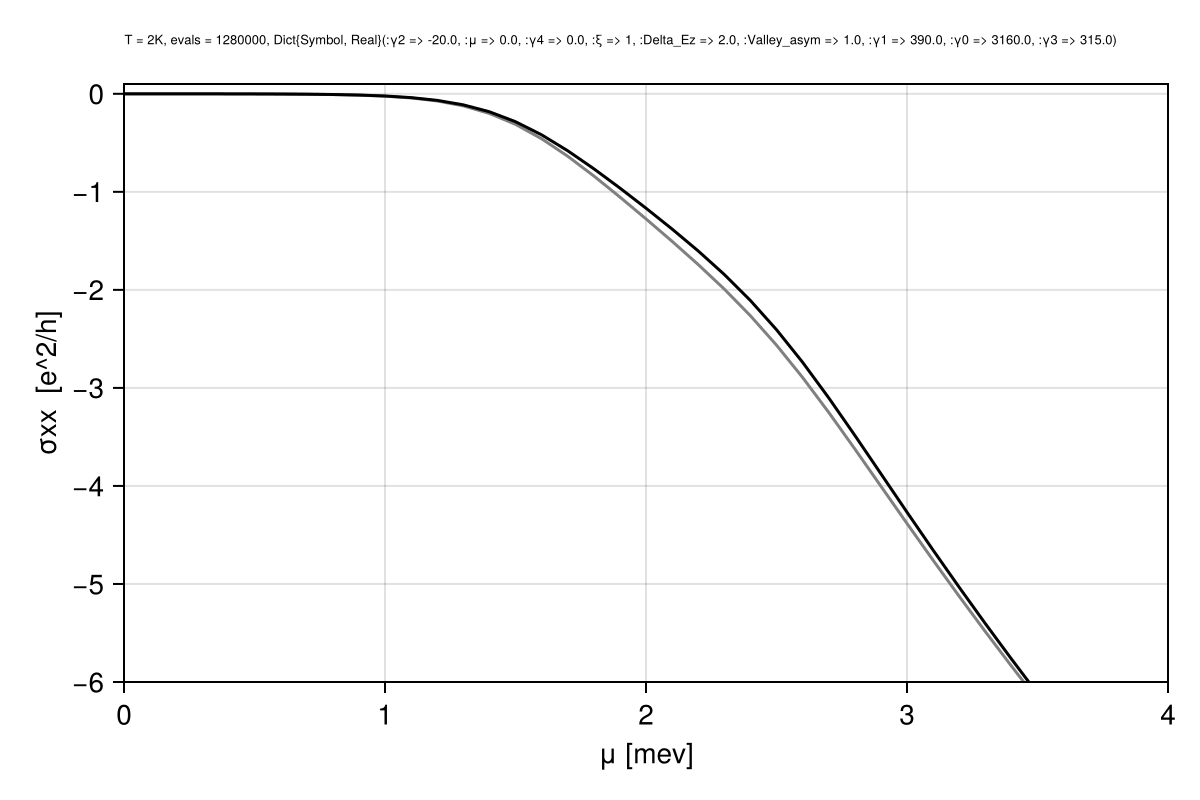

In [266]:
figcompare = Figure(size = (600,400))
Label(figcompare[0, 1:2],  "T = $(T)K, evals = $(evals), $(struct_to_dict(p))", fontsize = 6.5, halign = :left)

ax1 = Axis(figcompare[1,1:2], xlabel = "μ [mev]", ylabel = "σxx  [e^2/h]")
# lines!(ax1, μlist, Nmat_sxx_pv[1], color = :blue, linestyle = :dash, label ="K+")
# lines!(ax1, μlist, Nmat_sxx_nv[1], color = :red,linestyle = :dash, label ="K-")
lines!(ax1,  μlist, (Nmat_sxx_pv[6]+Nmat_sxx_nv[6]), color = :gray,linestyle = :solid, label ="K++K-")

# lines!(ax1, μlist, Nmat_sxx_pv[1] .+ 10*Nmat_lmc_pv[1], color = :blue, label ="K+")
# lines!(ax1, μlist, Nmat_sxx_nv[1] .+ 10*Nmat_lmc_nv[1], color = :red, label ="K-")
lines!(ax1,  μlist, (Nmat_sxx_pv[6]+Nmat_sxx_nv[6] + 10 * (Nmat_lmc_pv[6] +Nmat_lmc_nv[6])), color = :black, label ="K++K-")
ylims!(ax1,-6,0.1)
xlims!(ax1,0,4)
# # 10*Nmat_lmc_pv[1]
figcompare

In [245]:
(Nmat_lmc_pv +Nmat_lmc_nv)

6-element Vector{Vector{Float64}}:
 [1.0304772140888975e-7, 1.4262560067816285e-7, 2.3155948147908262e-7, 4.0059286453603837e-7, 7.080962552247864e-7, 1.2600491384452716e-6, 2.2460104009959026e-6, 4.002461435819121e-6, 7.1221156644585184e-6, 1.2636777664738556e-5  …  -5.504065862411414e-5, -5.461206269083722e-5, -5.417443511791212e-5, -5.372867279688728e-5, -5.327651158928081e-5, -5.281776907025879e-5, -5.235696047755484e-5, -5.189157284772659e-5, -5.142331813627436e-5, -5.0953499685033434e-5]
 [7.583502749051449e-9, 1.0536071063080392e-8, 1.7134859688532727e-8, 2.9661338051150545e-8, 5.244225915582202e-8, 9.333251517912818e-8, 1.6638648693575955e-7, 2.965714822542006e-7, 5.279322261009321e-7, 9.373470487696783e-7  …  -0.0012694918139404586, -0.0015666612597803053, 2.695118730231677e-5, 6.291543329936381e-5, 7.520715268936103e-5, 9.106154362836067e-5, 0.000111317423083029, 0.00013657979452381952, 0.00016690566955603547, 0.0002015107373587947]
 [2.037917017131393e-8, 3.2195573068435457e

#### Layer polarization

In [38]:
function mysz(p, q = [0.001,0.01])
    h = abc_pentalayer(q,p)
    ϵs, ψs = eigen(Matrix(h))
    return ψs'* σz * ψs
end

mysz (generic function with 2 methods)

In [39]:
mysz(Params5LG(p, Delta_Ez = 8))

2×2 Matrix{ComplexF64}:
  -0.99929+0.0im  0.0376797+0.0im
 0.0376797+0.0im    0.99929+0.0im

In [60]:
μ = 0
integrand(q) = real(mysz(Params5LG(p, μ = μ, ξ = 1), q)[1,1])
integrand2(q) = real(mysz(Params5LG(p, μ = μ, ξ = -1), q)[2,2])

cnst = 1 * p.γ1 / p.γ0 *√3/2 
as = [-cnst, -cnst];
bs = [cnst, cnst];

n = 200  # resolution (100x100 grid)
# Generate grid points
xs = range(as[1], bs[1], length=n)
ys = range(as[2], bs[2], length=n)


# Evaluate f on the grid
Zb = [integrand([xi, yi])  for xi in xs, yi in ys];  # notice: [row, column] ordering

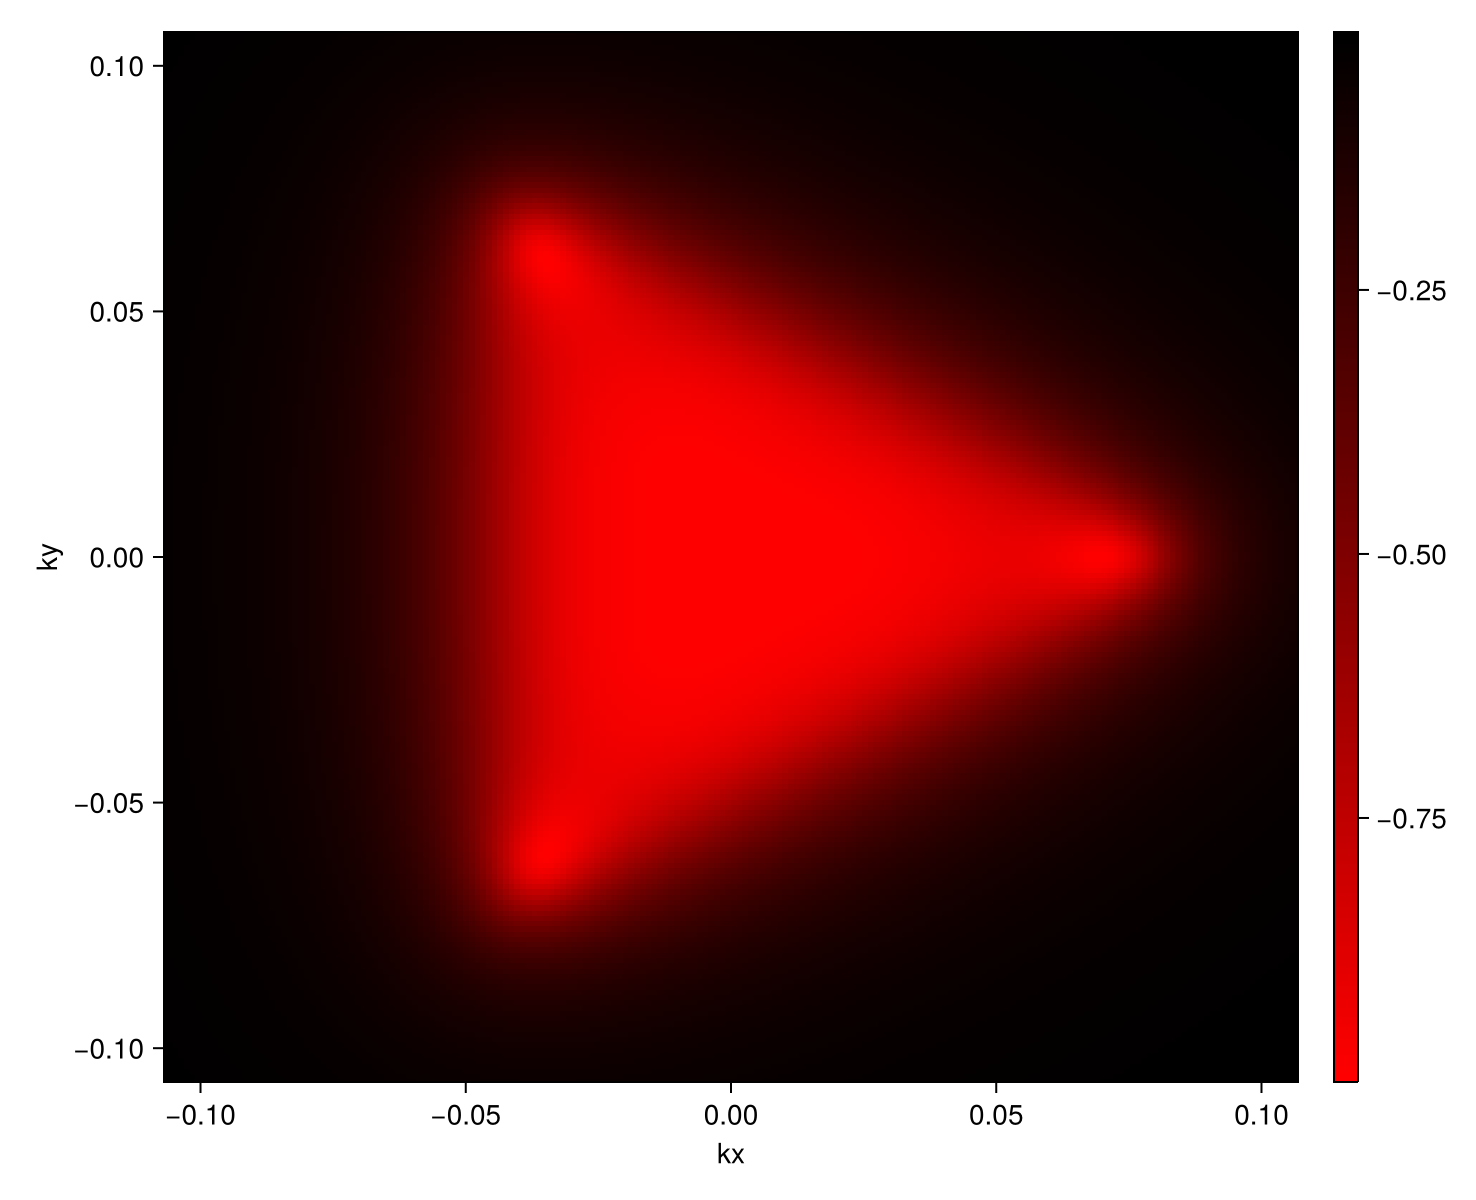

In [61]:
plotmap(xs,ys,Zb)

#### Maps LMCm

In [582]:
# Define number of grid points
# RUN Self-consistent bands Heavy Fermion section
μ = 10
integrand(q) = k_linear_magnetorresistance(:x, :x, :x, Params5LG(p, μ = μ), q; 
    T = T, τ = 1e-15, Ω_contr = true, omm_contr = true, fermi_surface = false)

cnst = 1*p.γ1/p.γ0 *√3/2 
as = [-cnst, -cnst];
bs = [cnst, cnst];

n = 100  # resolution (100x100 grid)
# Generate grid points
xs = range(as[1], bs[1], length=n)
ys = range(as[2], bs[2], length=n)


# Evaluate f on the grid
Zb = [integrand([xi, yi]) for xi in xs, yi in ys];  # notice: [row, column] ordering

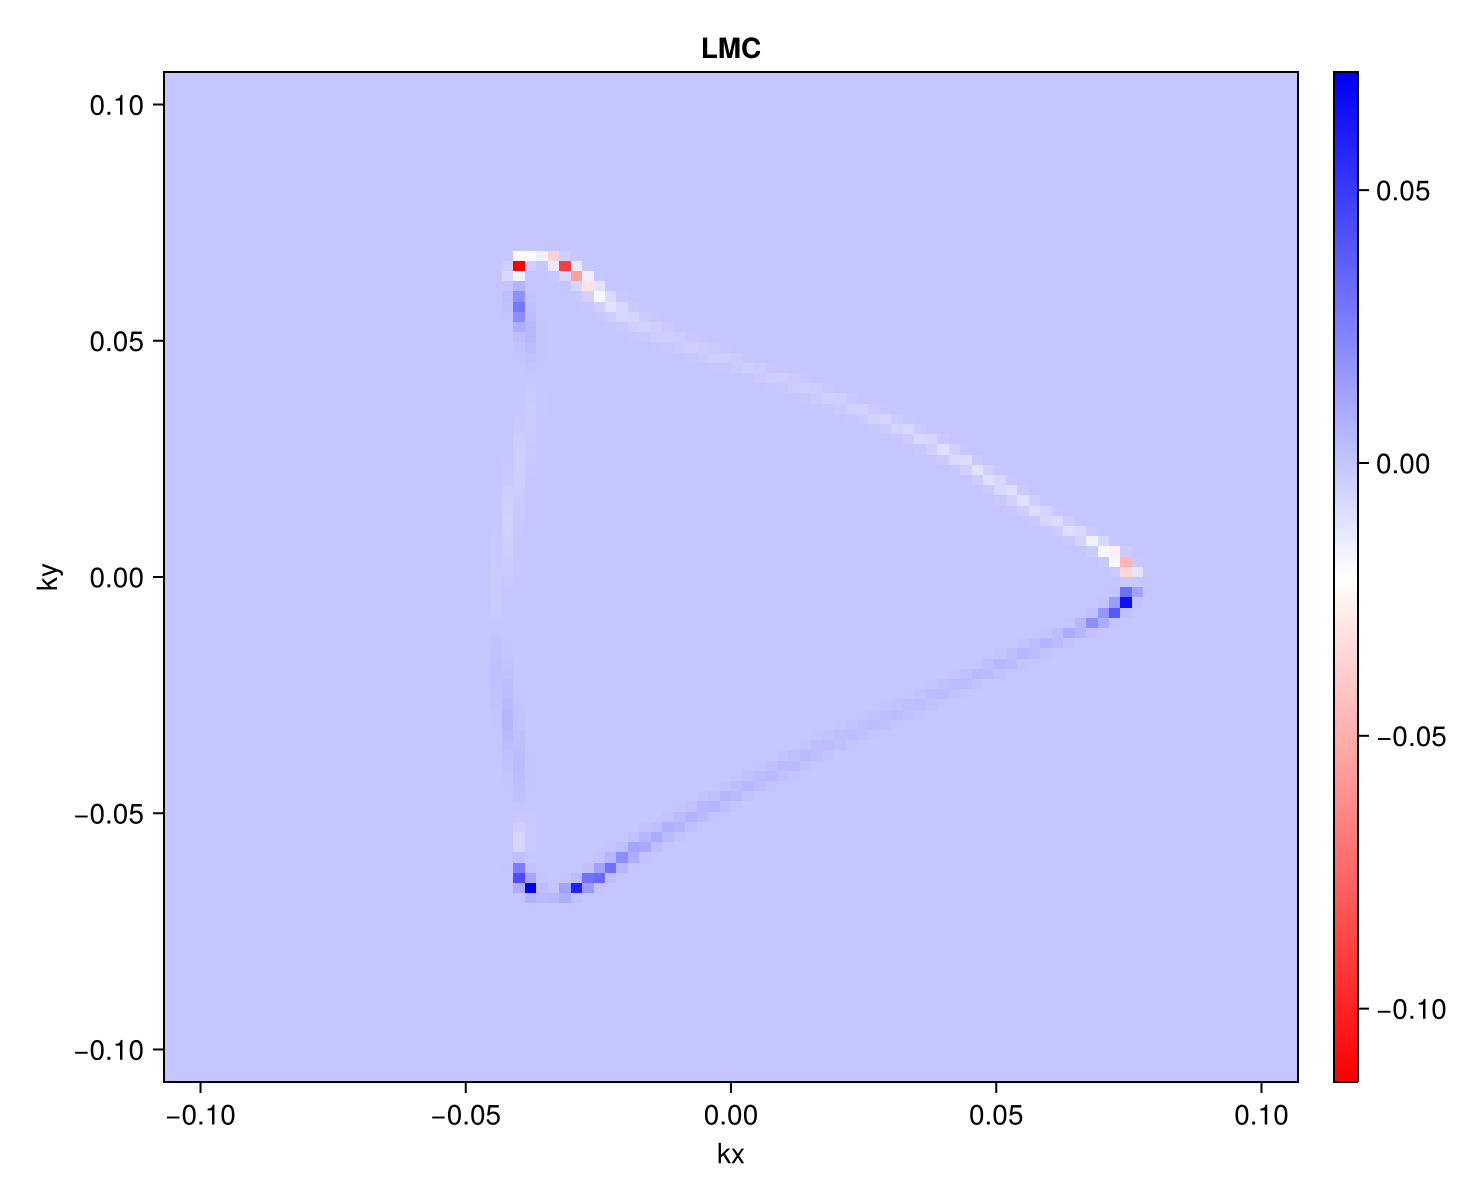

In [583]:

# Create the density plot
vis = 250
fig = Figure(size=(1.23*600,600))
ax = Axis(fig[1, 1], xlabel="kx", ylabel="ky", title="LMC")
# # heatmap!(ax, x, y, Z, colormap=:redsblues)#, colorrange=(-1, 1.0).*vis)
cmap = cgrad([:red, :white, :blue])
hm = heatmap!(ax, xs, ys, real(Zb), colormap=cmap)#, colorrange=(-1, 1.0).*vis)
# Colorbar(fig[1,2], ax)  # Add a colorbar
cb = Colorbar(fig[1, 2], hm)
xlims!(ax, as[1], bs[1])
ylims!(ax, as[2], bs[2])
fig

### Velocities

In [113]:
function myvx(ξ,  q = [0.001,0.01])
    h = abc_pentalayer(q, Params5LG(p, ξ = ξ))
    ϵs, ψs = eigen(Matrix(h))
    dhx = dhx5lg(q, Params5LG(p, ξ = ξ))
    return ψs'* dhx* ψs
end
function myvy(ξ,  q = [0.001,0.01])
    h = abc_pentalayer(q, Params5LG(p, ξ = ξ))
    ϵs, ψs = eigen(Matrix(h))
    dhy = dhy5lg(q, Params5LG(p, ξ = ξ))
    return ψs'* dhy* ψs
end

myvy (generic function with 2 methods)

In [114]:
m12x(k, θ, p) =  cos(θ-ifelse(p.ξ==1, 0, π)) * dkX5LG(k, θ, p) - 
    sin(θ-ifelse(p.ξ==1, 0, π))/k * dθX5LG(k, θ, p)

m12x (generic function with 1 method)

In [115]:
theta = 2.3
m12x(0.01, theta, Params5LG(p, ξ = -1))

0.663868318782368 - 0.1517879886562135im

In [116]:
dhx5lg(0.01, theta, Params5LG(p, ξ = 1)) 

2×2 Matrix{ComplexF64}:
      -0.0+0.0im       -0.663868+0.151788im
 -0.663868-0.151788im       -0.0+0.0im

In [118]:
myvx(-1,[0.01,0.0])

2×2 Matrix{ComplexF64}:
 -0.000463761+0.0im        0.681+0.0im
        0.681+0.0im  0.000463761+0.0im

In [103]:
function myvel(p, q)
    h = abc_pentalayer(q, p)
    ϵs, ψs = eigen(Matrix(h))
    dhx = dhx5lg(q, p)
    dhy = dhy5lg(q, p)
    rzmat = rz5lg(ψs, p, q) 
    vx = ψs'* dhx* ψs
    vy = ψs'* dhy* ψs
    diag(vy)
    # return vx
end

myvel (generic function with 1 method)

In [119]:
ks = abcbz_path_gamma_k_m_gamma(100, p)
μ = 0
integrand(q) = real(myvel(Params5LG(p, μ = μ, ξ = 1), q)[1])
integrand2(q) = real(myvel(Params5LG(p, μ = μ, ξ = -1), q)[1])
vs = [integrand([k[2],k[1]]) for k in ks]
vs2 = [integrand2([k[2],k[1]]) for k in ks]
fig = Figure()
ax = Axis(fig[1,1])
lines!(ax, vs)
lines!(ax, vs2)
fig


MethodError: MethodError: no method matching rz5lg(::Matrix{ComplexF64}, ::Params5LG, ::Vector{Float64})

Closest candidates are:
  rz5lg(::Any)
   @ Main ~/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/ABCNlayer.jl:92


In [752]:
# Define number of grid points
# RUN Self-consistent bands Heavy Fermion section
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/ABCNlayer.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/k_abcobservables")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/HF_Optics.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/lmc.jl")
μ = 0
integrand(q) = real(myvel(Params5LG(p, μ = μ, ξ = 1), q)[1])
integrand2(q) = real(myvel(Params5LG(p, μ = μ, ξ = -1), q)[1])

cnst = 1*p.γ1/p.γ0 *√3/2 
as = [-cnst, -cnst];
bs = [cnst, cnst];

n = 200  # resolution (100x100 grid)
# Generate grid points
xs = range(as[1], bs[1], length=n)
ys = range(as[2], bs[2], length=n)


# Evaluate f on the grid
Zb = [integrand([xi, yi]) * integrand2([xi, yi]) for xi in xs, yi in ys];  # notice: [row, column] ordering

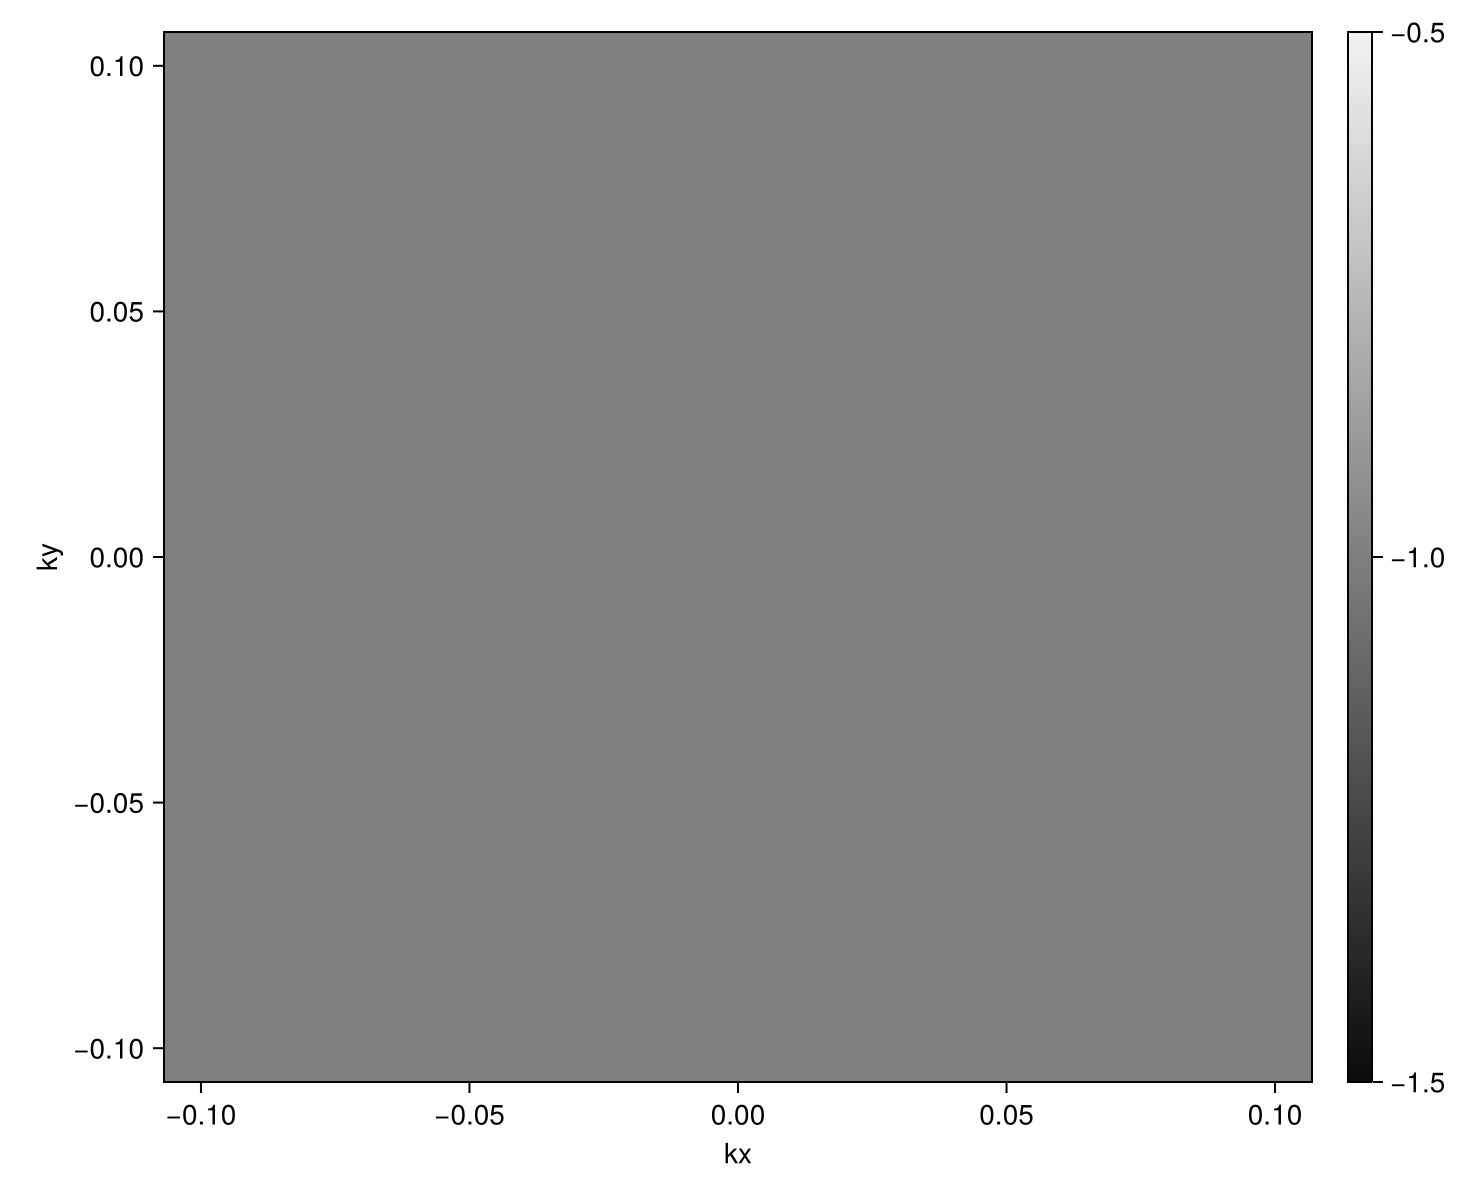

In [753]:
plotmap(xs,ys,sign.(Zb))

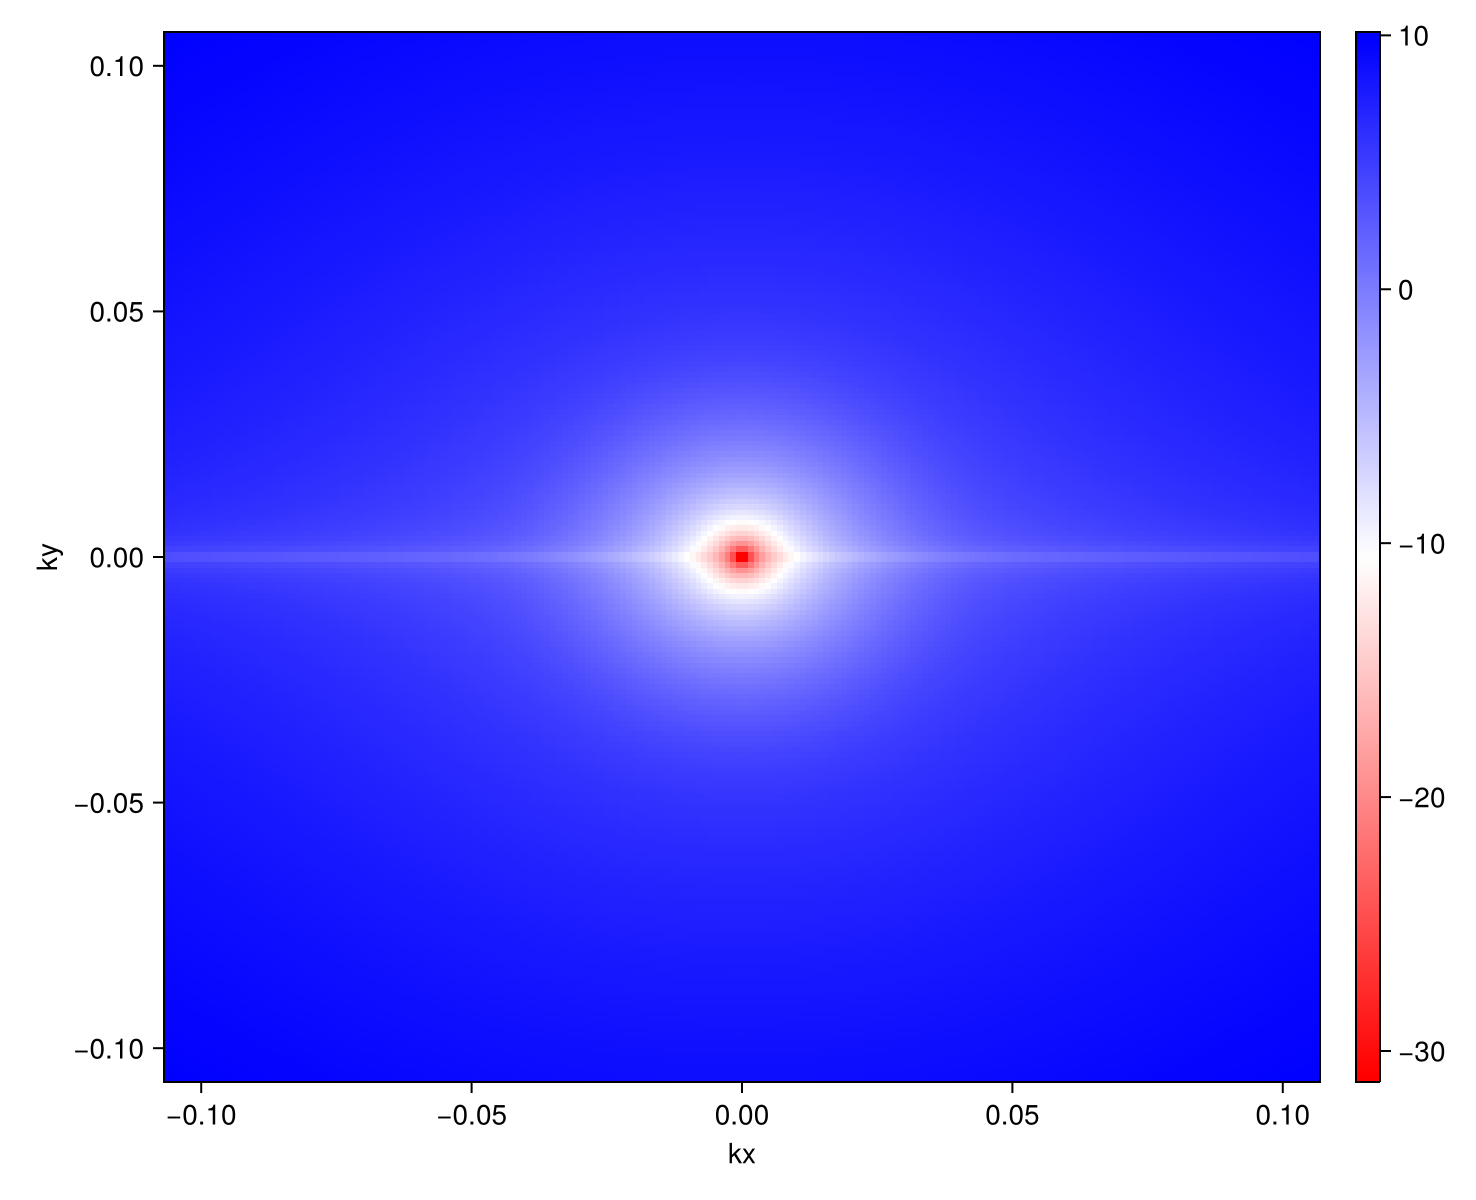

In [730]:
plotmap(xs,ys, log.(abs.(Zb)))

### Unified plot

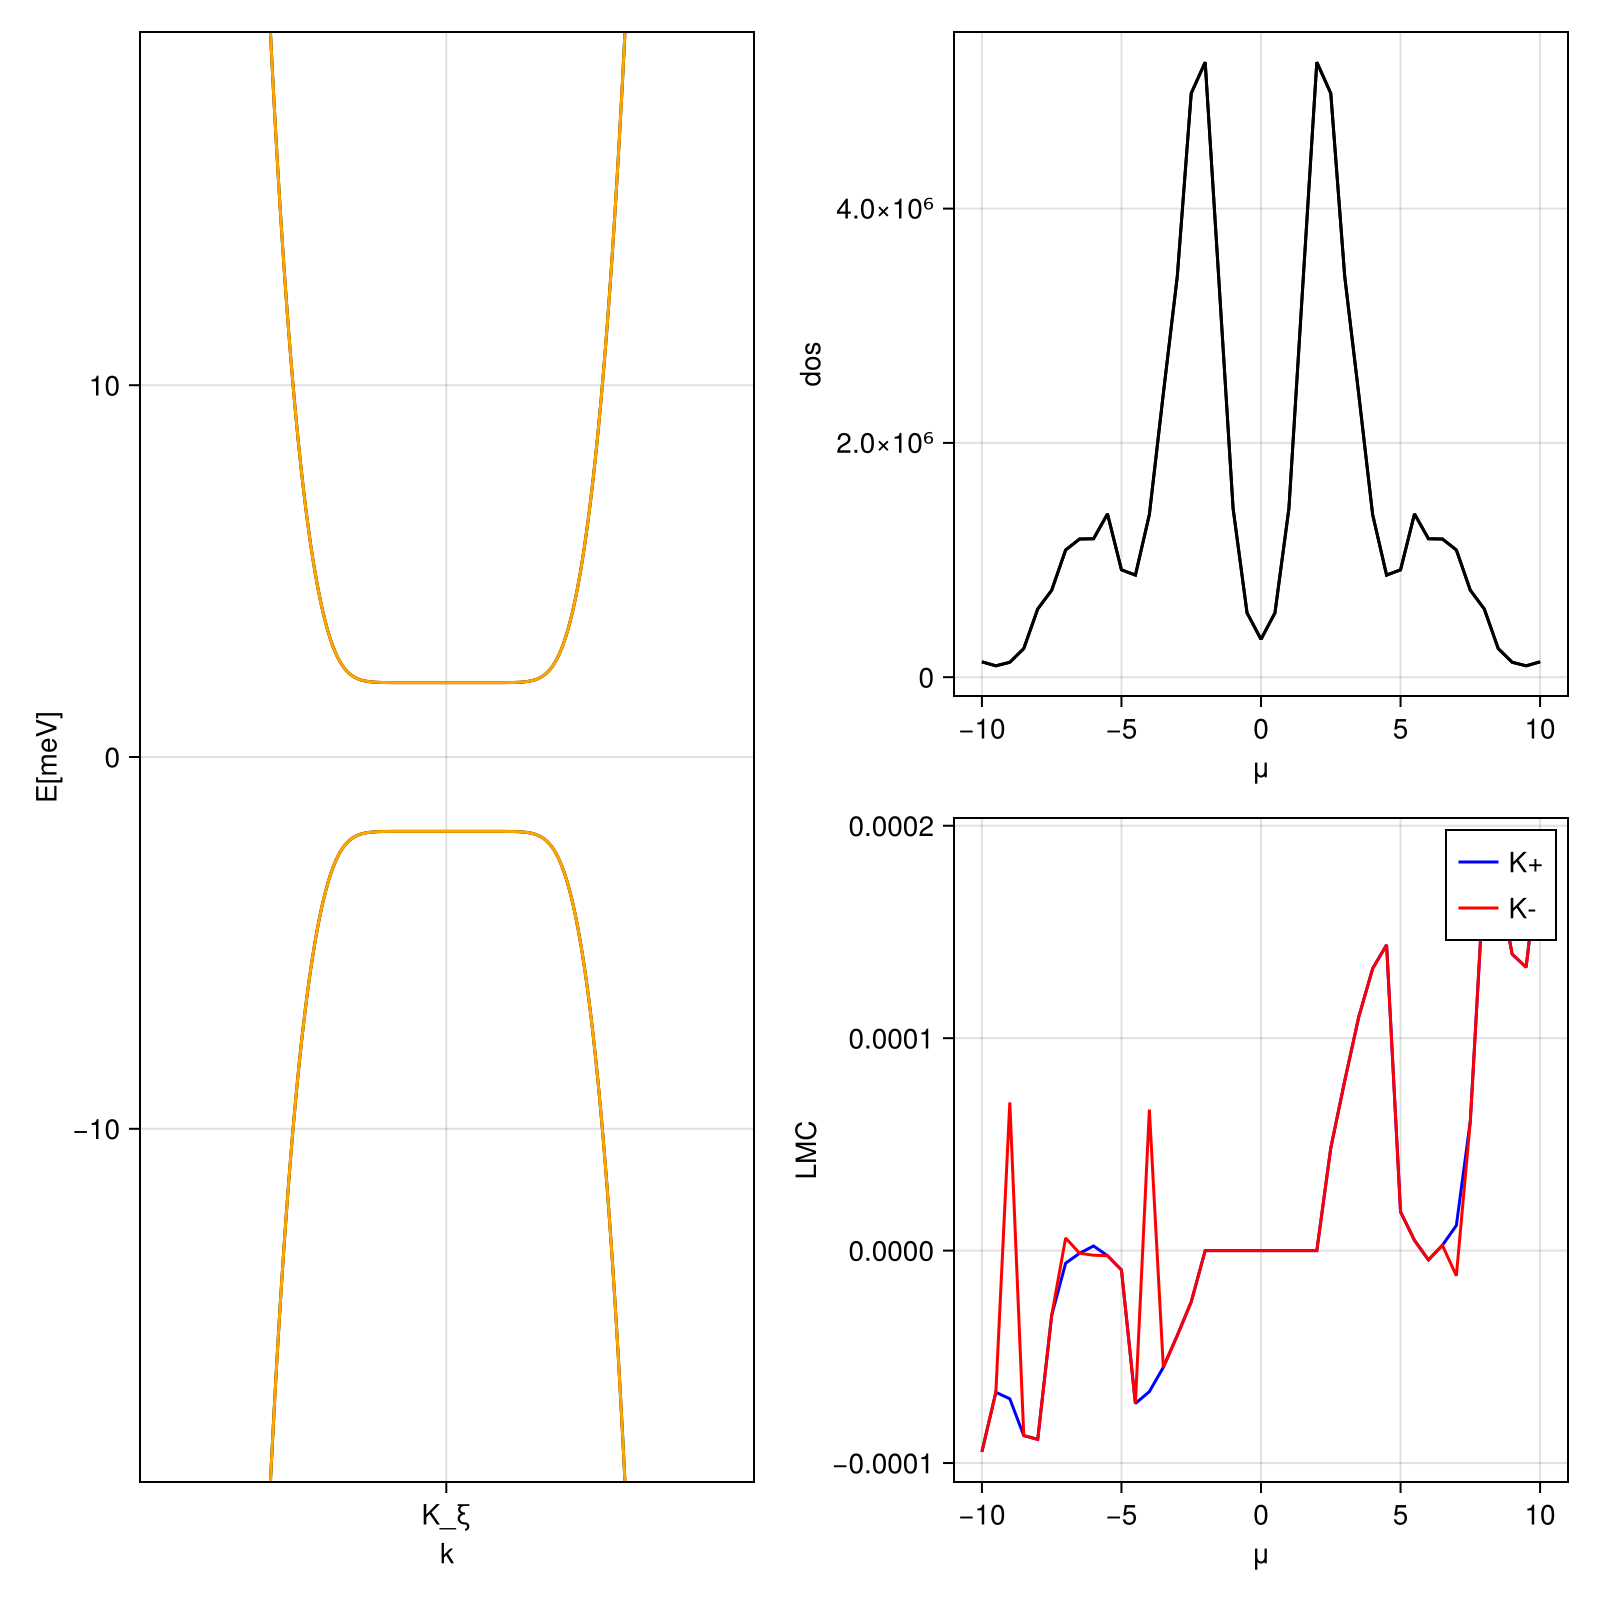

In [44]:
fig_unified = Figure(size = (800,800))
axbands = Axis(fig_unified[1:2,1], xlabel = "k", ylabel = "E[meV]")
abcplotbandsk(axbands, 200, Params5LG(p, ξ =1))
abcplotbandsk(axbands, 200, Params5LG(p, ξ =-1), color = :orange)

axfs = Axis(fig_unified[1,2], xlabel = "μ", ylabel = "dos")
lines!(axfs, μlist, -fspv, color = :black)
lines!(axfs, μlist, -fsnv, color = :black)

axlmc = Axis(fig_unified[2,2], xlabel = "μ", ylabel = "LMC")
lines!(axlmc, μlist, lmc_pv, color = :blue, label ="K+")
lines!(axlmc, μlist, lmc_nv, color = :red, label ="K-")
axislegend()

fig_unified

In [ ]:
figbs = abcplotbandsk(200, Params5LG(p, ξ =1))
abcplotbandsk(fig, 200, Params5LG(p, ξ =-1))

figfs = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "dos")
lines!(ax, μlist, -fs, color = :black)
fig

figlmc = Figure() 
axlmc = Axis(fig[1,3], xlabel = "μ", ylabel = "LMC")
lines!(axlmc, μlist, lmc_pv, color = :blue, label ="K+")
lines!(axlmc, μlist, lmc_nv, color = :red, label ="K-")
axislegend()
fig

### Orbital and berry contributions in the layer polarized limit

In [222]:
lmc_pv_everything = [magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals,
     Ω_contr = true, omm_contr = true, fermi_surface = false) for μ in μlist];
lmc_pv_berry= [magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals,
     Ω_contr = true, omm_contr = false, fermi_surface = false) for μ in μlist];
lmc_pv_omm = [magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals,
     Ω_contr = false, omm_contr = true, fermi_surface = false) for μ in μlist];

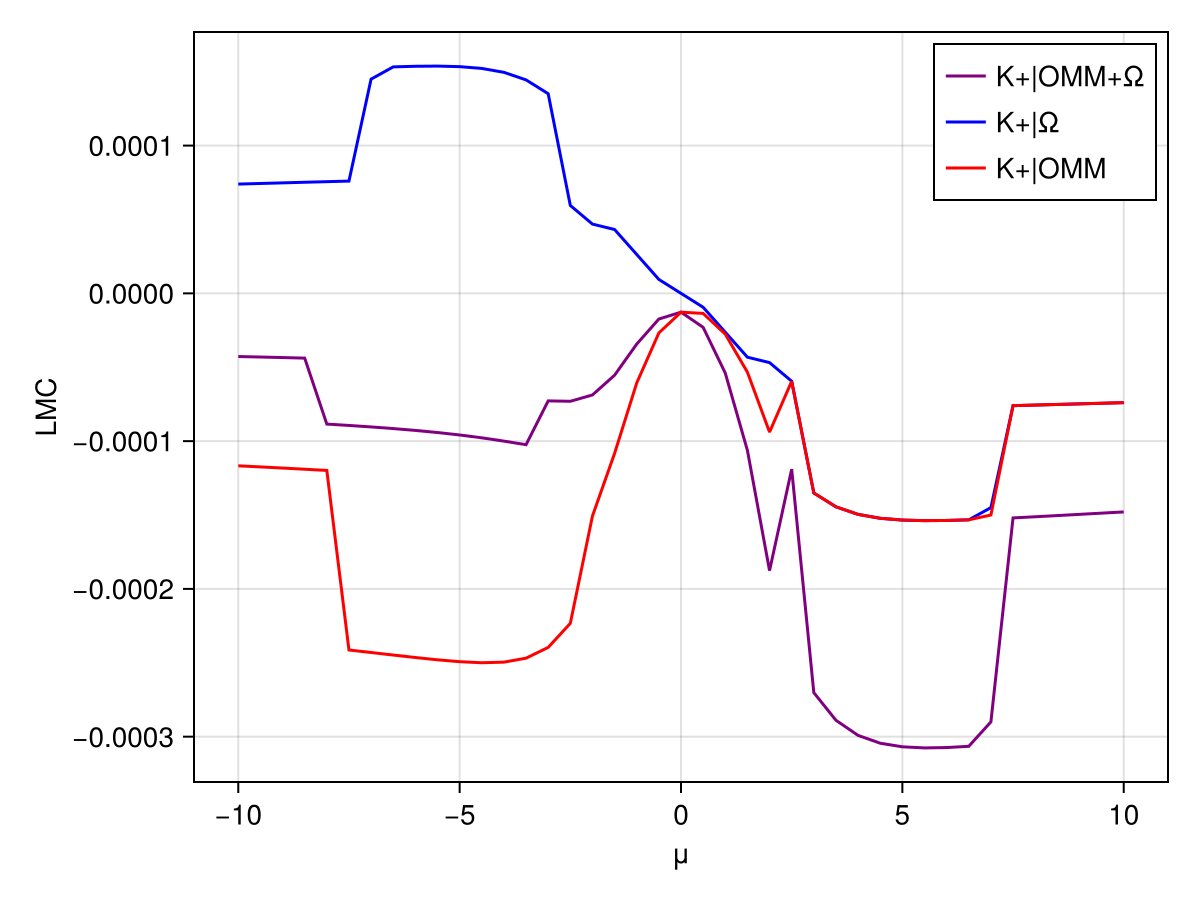

In [223]:
figlmc = Figure() 
ax = Axis(figlmc[1,1], xlabel = "μ", ylabel = "LMC")
lines!(ax, μlist, lmc_pv_everything, color = :purple, label ="K+|OMM+Ω")
lines!(ax, μlist, lmc_pv_berry, color = :blue, label ="K+|Ω")
lines!(ax, μlist, lmc_pv_omm, color = :red, label ="K+|OMM")
axislegend()
figlmc

### \sigma_xx

#### \sigmaxxx 5 layers

In [166]:
sxx_nvt = [in_plane_bindependent_conductivity(5,Params5LG(p, ξ=-1, μ = μ), T = T, evals = evals) for μ in μlist]

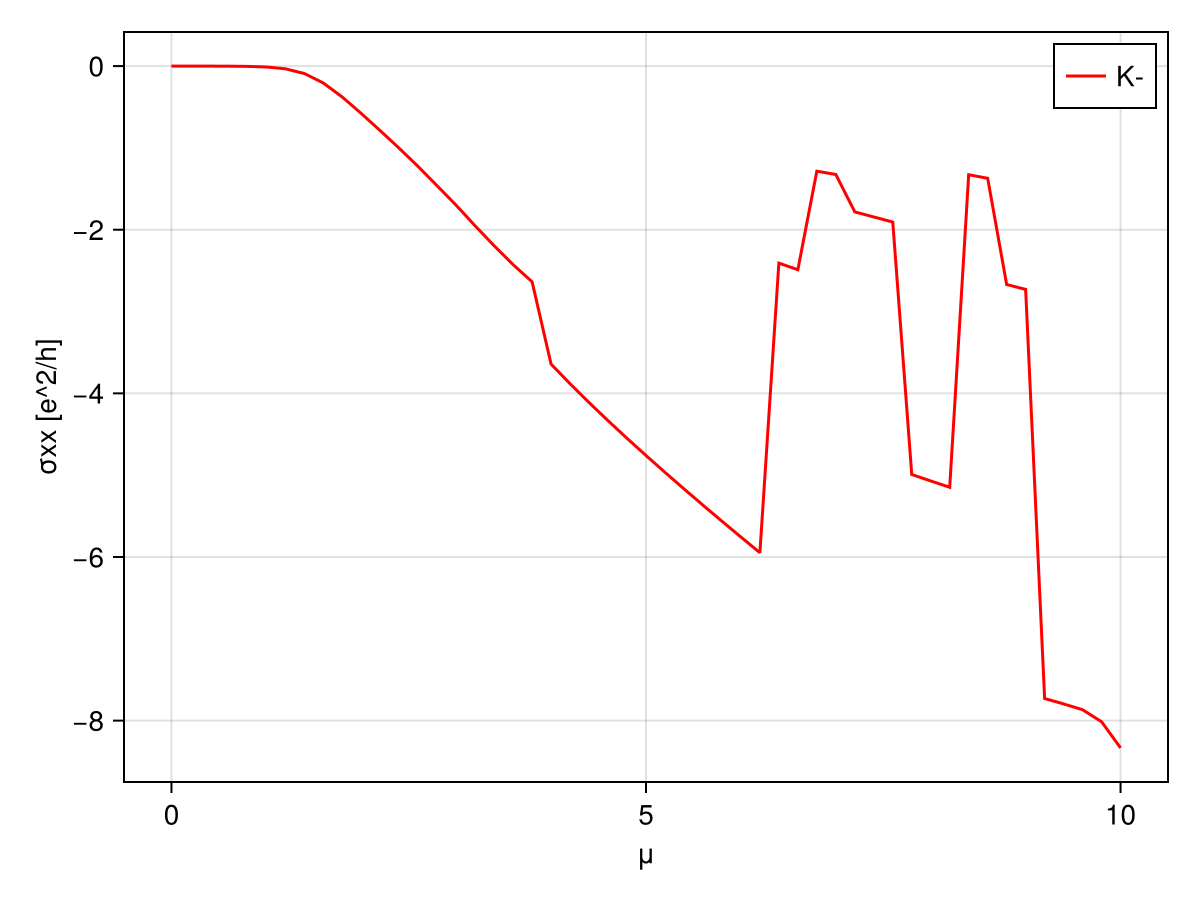

In [289]:
figsxx = Figure() 
ax = Axis(figsxx[1,1], xlabel = "μ", ylabel = "σxx [e^2/h]")
lines!(ax, μlist, sxx_nvt, color = :red, label ="K-")
axislegend()
figsxx

In [290]:
sxx_pv = [in_plane_bindependent_conductivity(Params5LG(p, ξ=1, μ = μ), T = T, evals = evals) for μ in μlist];
sxx_nv = [in_plane_bindependent_conductivity(Params5LG(p, ξ=-1, μ = μ), T = T, evals = evals) for μ in μlist];

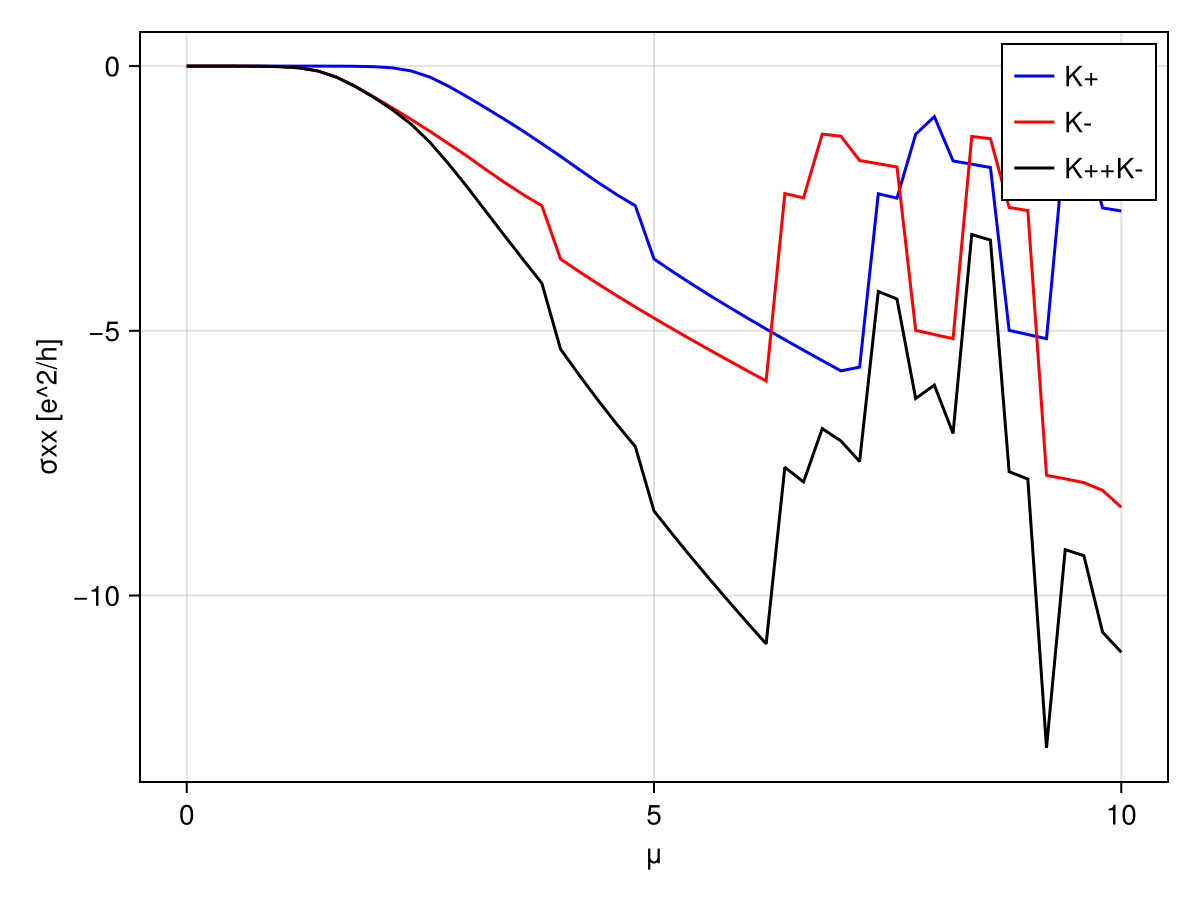

In [303]:
figsxx = Figure() 
ax = Axis(figsxx[1,1], xlabel = "μ", ylabel = "σxx [e^2/h]")
lines!(ax, μlist, sxx_pv, color = :blue, label ="K+")
lines!(ax, μlist, sxx_nv, color = :red, label ="K-")
lines!(ax,  μlist, sxx_pv+sxx_nv, color = :black, label ="K++K-")
axislegend()
figsxx

#### \sigmaxx n layers

In [211]:
Nmat_sxx_pv = [[in_plane_bindependent_conductivity(N, Params5LG(p, ξ=1, μ = μ), T = T, evals = evals) for μ in μlist] for N in Nlist]
Nmat_sxx_nv = [[in_plane_bindependent_conductivity(N, Params5LG(p, ξ=-1, μ = μ), T = T, evals = evals) for μ in μlist] for N in Nlist]

6-element Vector{Vector{Float64}}:
 [-4.782832111108906e-5, -8.525998712526281e-5, -0.0001521945137228026, -0.0002717719953055073, -0.00048528479994107383, -0.0008663131203397503, -0.0015456898216644071, -0.002755183641765733, -0.004902669032939969, -0.008697573798979846  …  -2.440768626225332, -2.4592219167827976, -2.477636919554185, -2.496014796050512, -2.5143567156001922, -2.5326636902836923, -2.5509367504676903, -2.5691768196566347, -2.5873848846233787, -2.605561635022716]
 [-6.261705496503886e-6, -1.1162287280947817e-5, -1.9925429900694263e-5, -3.558072402708975e-5, -6.353444270967249e-5, -0.00011342056925305708, -0.0002023704696835803, -0.00036073594985381387, -0.0006419433708149325, -0.0011389586599852759  …  -2.3845779530811027, -2.4230021984608183, -2.5232814600074502, -2.5868023155956354, -2.6542547447775684, -2.725261732255691, -2.8002292864263567, -2.8797545949514682, -2.963945276200852, -3.195369156767744]
 [-2.129170912947501e-5, -3.795520357299935e-5, -6.775264631766147e

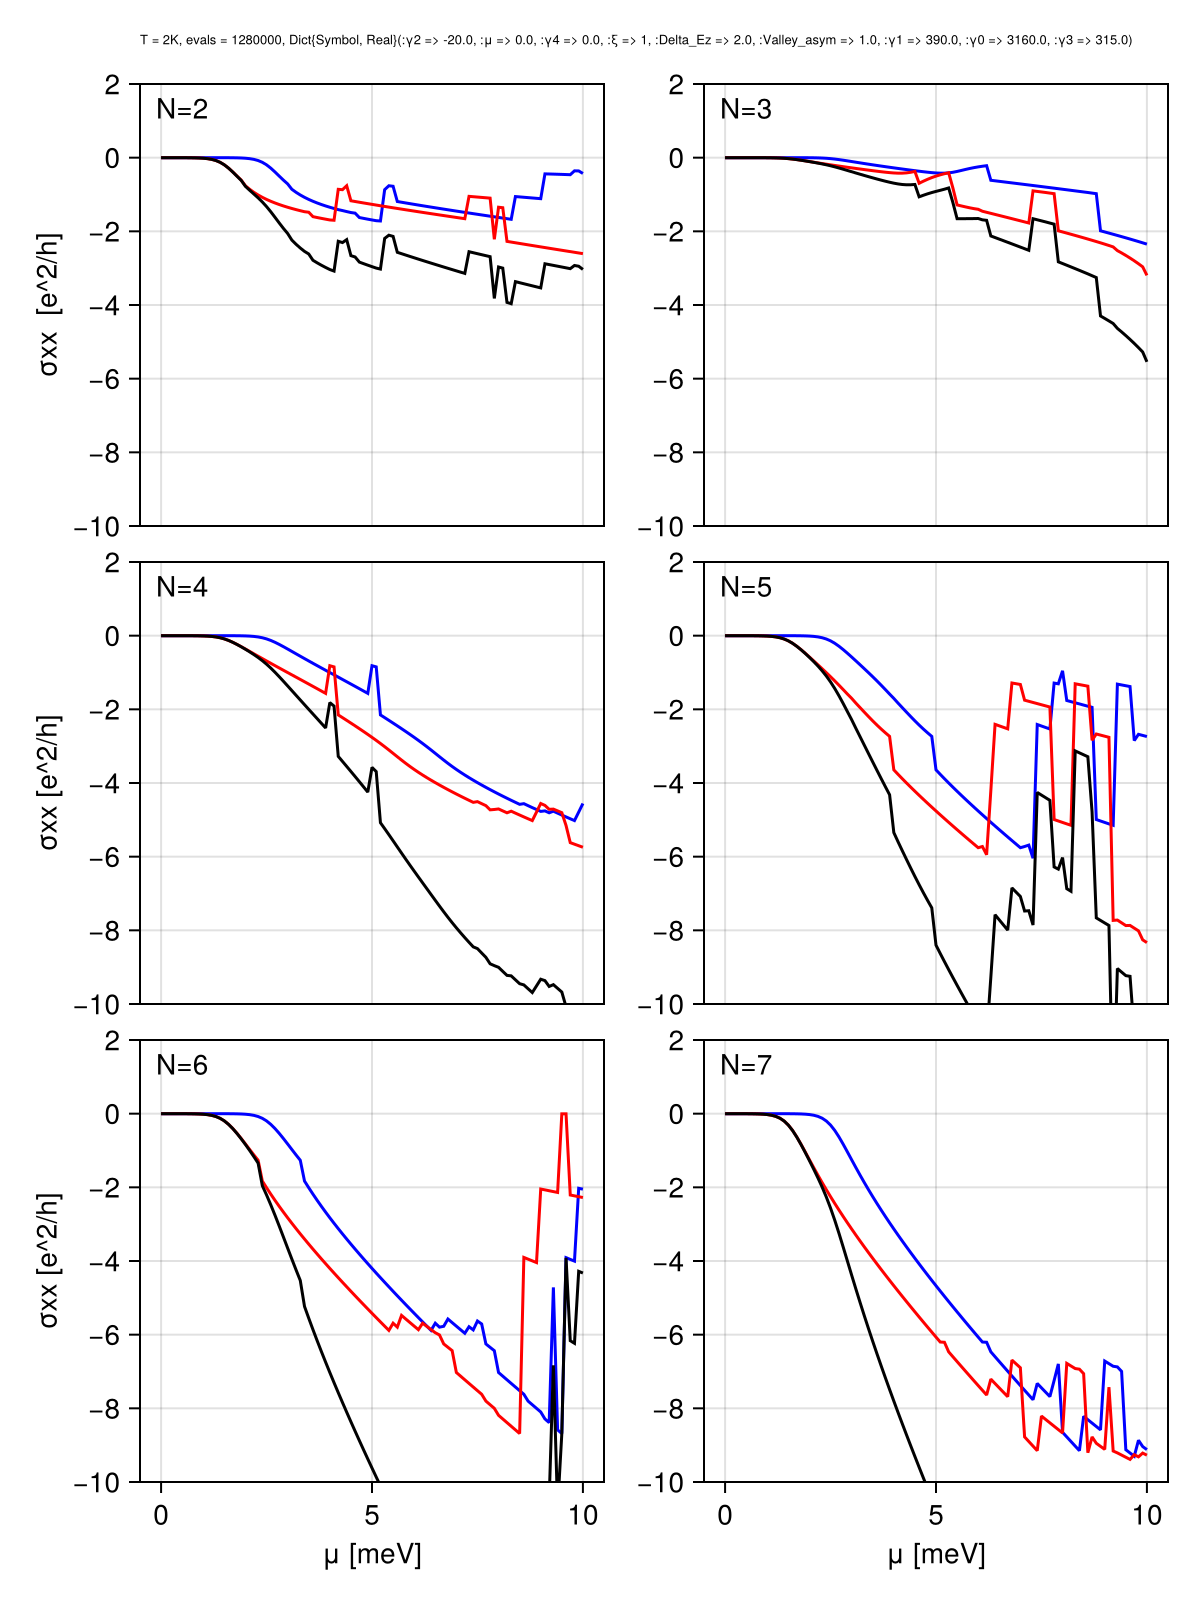

In [212]:
figNmatsxx = Figure(size = (600,800))
Label(figNmatsxx[0, 1:2],  "T = $(T)K, evals = $(evals), $(struct_to_dict(p))", fontsize = 6.5, halign = :left)

ax1 = Axis(figNmatsxx[1,1], xlabel = "μ [mev]", ylabel = "σxx  [e^2/h]")
lines!(ax1, μlist, Nmat_sxx_pv[1], color = :blue, label ="K+")
lines!(ax1, μlist, Nmat_sxx_nv[1], color = :red, label ="K-")
lines!(ax1,  μlist, (Nmat_sxx_pv[1]+Nmat_sxx_nv[1]), color = :black, label ="K++K-")

ax2 = Axis(figNmatsxx[2,1], xlabel = "μ", ylabel = "σxx [e^2/h]")
lines!(ax2, μlist, Nmat_sxx_pv[3], color = :blue, label ="K+")
lines!(ax2, μlist, Nmat_sxx_nv[3], color = :red, label ="K-")
lines!(ax2,  μlist, (Nmat_sxx_pv[3]+Nmat_sxx_nv[3]), color = :black, label ="K++K-")

ax3 = Axis(figNmatsxx[3,1], xlabel = "μ [meV]", ylabel = "σxx [e^2/h]")
lines!(ax3, μlist, Nmat_sxx_pv[5], color = :blue, label ="K+")
lines!(ax3, μlist, Nmat_sxx_nv[5], color = :red, label ="K-")
lines!(ax3,  μlist, (Nmat_sxx_pv[5]+Nmat_sxx_nv[5]), color = :black, label ="K++K-")

ax4 = Axis(figNmatsxx[1,2])
lines!(ax4, μlist, Nmat_sxx_pv[2], color = :blue, label ="K+")
lines!(ax4, μlist, Nmat_sxx_nv[2], color = :red, label ="K-")
lines!(ax4,  μlist, (Nmat_sxx_pv[2]+Nmat_sxx_nv[2]), color = :black, label ="K++K-")

ax5 = Axis(figNmatsxx[2,2])
lines!(ax5, μlist, Nmat_sxx_pv[4], color = :blue, label ="K+")
lines!(ax5, μlist, Nmat_sxx_nv[4], color = :red, label ="K-")
lines!(ax5,  μlist, (Nmat_sxx_pv[4]+Nmat_sxx_nv[4]), color = :black, label ="K++K-")

ax6 = Axis(figNmatsxx[3,2],xlabel = "μ [meV]")
lines!(ax6, μlist, Nmat_sxx_pv[6], color = :blue, label ="K+")
lines!(ax6, μlist, Nmat_sxx_nv[6], color = :red, label ="K-")
lines!(ax6,  μlist, (Nmat_sxx_pv[6]+Nmat_sxx_nv[6]), color = :black, label ="K++K-")

hidexdecorations!(ax1,grid = false)
hidexdecorations!(ax2,grid = false)
hidexdecorations!(ax4,grid = false)
hidexdecorations!(ax5,grid = false)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]
    ylims!(ax, (-1,0.2) .* 10) 
end


text!(ax1, 0.5, 0.9,text = "N=2", color = :black, align = (:center, :bottom))
text!(ax2, 0.5, 0.9,text = "N=4", color = :black, align = (:center, :bottom))
text!(ax3,  0.5, 0.9,text = "N=6", color = :black, align = (:center, :bottom))
text!(ax4,  0.5, 0.9,text = "N=3", color = :black, align = (:center, :bottom))
text!(ax5,  0.5, 0.9,text = "N=5", color = :black, align = (:center, :bottom))
text!(ax6,  0.5, 0.9,text = "N=7", color = :black, align = (:center, :bottom))

figNmatsxx

### Combine LMC and \sigmaxx

#### Combine LMC and \sigmaxx 5 layers

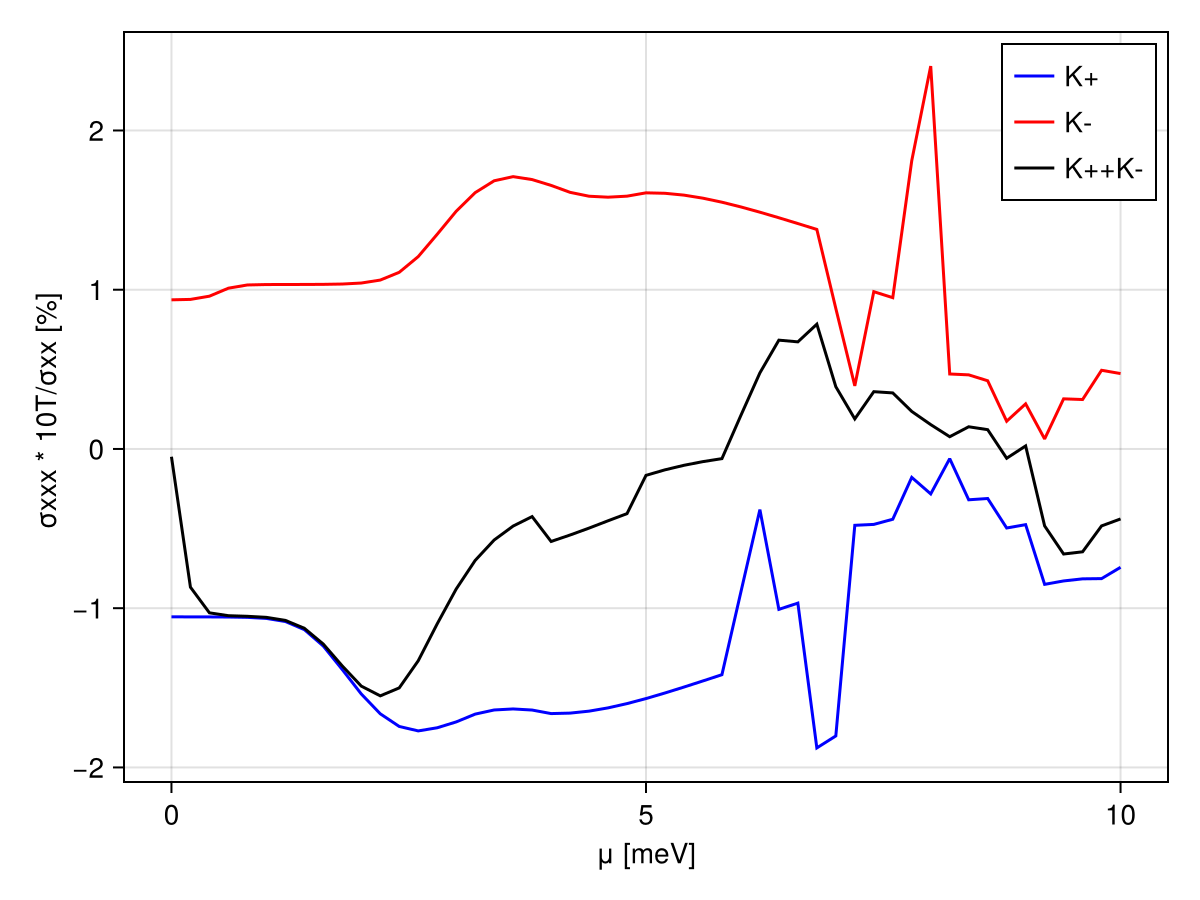

In [304]:
figsxx = Figure() 
B = 10
ax = Axis(figsxx[1,1], xlabel = "μ [meV]", ylabel = "σxxx * 10T/σxx [%] ")
lines!(ax, μlist, 100*B*lmc_nv ./ (sxx_nv+B*lmc_nv) , color = :blue, label ="K+")
lines!(ax, μlist, 100*B*lmc_pv ./ (sxx_pv+B*lmc_pv) , color = :red, label ="K-")
lines!(ax,  μlist, 100 * B *(lmc_pv + lmc_nv) ./ (B *(lmc_pv + lmc_nv)+sxx_pv+sxx_nv), color = :black, label ="K++K-")
axislegend()
figsxx

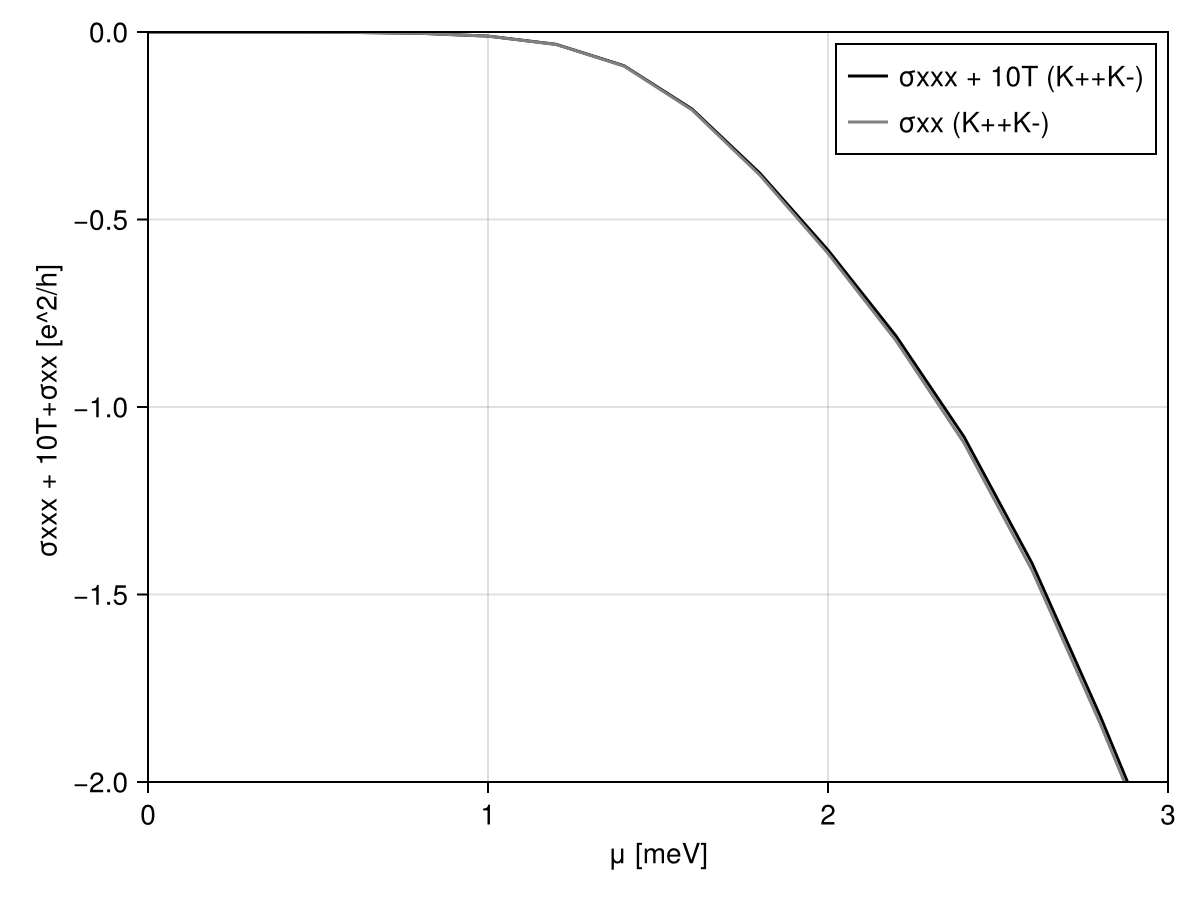

In [305]:
figsxx = Figure() 
B = 10
t_lmc = lmc_pv + lmc_nv
t_sxx = sxx_pv + sxx_nv

ax = Axis(figsxx[1,1], xlabel = "μ [meV]", ylabel = "σxxx + 10T+σxx [e^2/h] ")
lines!(ax,  μlist, B * t_lmc +  t_sxx, color = :black, label ="σxxx + 10T (K++K-)")
lines!(ax,  μlist, t_sxx, color = :gray, label ="σxx (K++K-)")
xlims!(ax, 0, 3)
ylims!(ax, -2, 0)
axislegend()
figsxx

#### Combine LMC and \sigmaxx N layers

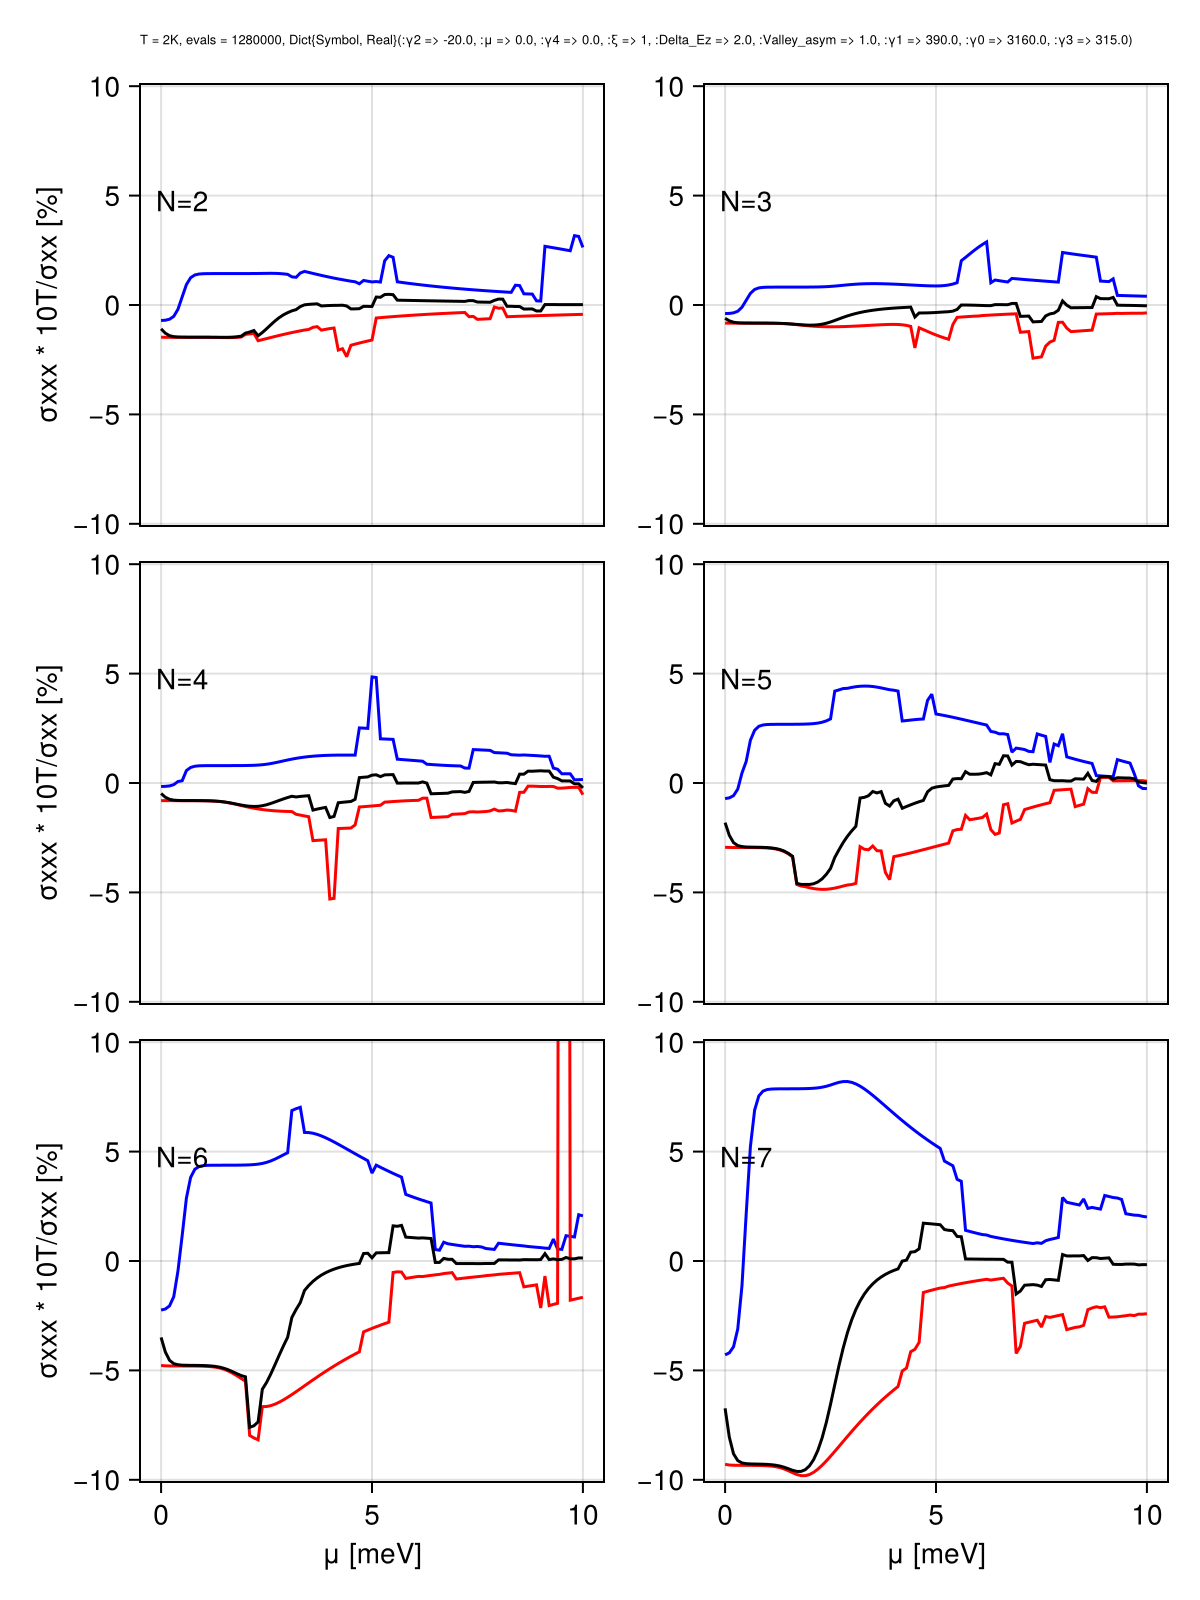

In [213]:
B = 10

function linesax!(ax, it)
    lines!(ax, μlist, 100*B*Nmat_lmc_pv[it] ./ (B*Nmat_lmc_pv[it] .+ Nmat_sxx_pv[it]), color = :blue, label ="K+")
    lines!(ax, μlist,100*B*Nmat_lmc_nv[it] ./ (B*Nmat_lmc_nv[it] .+ Nmat_sxx_nv[it]), color = :red, label ="K-")
    lines!(ax,  μlist,100*B*(Nmat_lmc_pv[it]+Nmat_lmc_nv[it]) ./ (B*Nmat_lmc_pv[it] .+ Nmat_sxx_pv[it] .+ B*Nmat_lmc_nv[it] .+ Nmat_sxx_nv[it]), color = :black, label ="K++K-")
end

figNmatcomp = Figure(size = (600,800))
Label(figNmatcomp[0, 1:2],  "T = $(T)K, evals = $(evals), $(struct_to_dict(p))", fontsize = 6.5, halign = :left)

it = 1
ax1 = Axis(figNmatcomp[1,1], xlabel = "μ [meV]", ylabel = "σxxx * 10T/σxx [%]")
linesax!(ax1, 1)


ax2 = Axis(figNmatcomp[2,1], xlabel = "μ [meV]", ylabel = "σxxx * 10T/σxx [%]")
linesax!(ax2, 3)

ax3 = Axis(figNmatcomp[3,1], xlabel = "μ [meV]", ylabel = "σxxx * 10T/σxx [%]")
linesax!(ax3, 5)

ax4 = Axis(figNmatcomp[1,2])
linesax!(ax4, 2)

ax5 = Axis(figNmatcomp[2,2])
linesax!(ax5, 4)

ax6 = Axis(figNmatcomp[3,2], xlabel = "μ [meV]")
linesax!(ax6, 6)

hidexdecorations!(ax1, grid = false)
hidexdecorations!(ax2,grid = false)
hidexdecorations!(ax4,grid = false)
hidexdecorations!(ax5,grid = false)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]
    ylims!(ax, (-1,1) .* 10.1) 
end


text!(ax1, 0.5, 4,text = "N=2", color = :black, align = (:center, :bottom))
text!(ax2, 0.5, 4,text = "N=4", color = :black, align = (:center, :bottom))
text!(ax3,  0.5, 4,text = "N=6", color = :black, align = (:center, :bottom))
text!(ax4,  0.5, 4,text = "N=3", color = :black, align = (:center, :bottom))
text!(ax5,  0.5, 4,text = "N=5", color = :black, align = (:center, :bottom))
text!(ax6,  0.5, 4,text = "N=7", color = :black, align = (:center, :bottom))

figNmatcomp

### Convergence

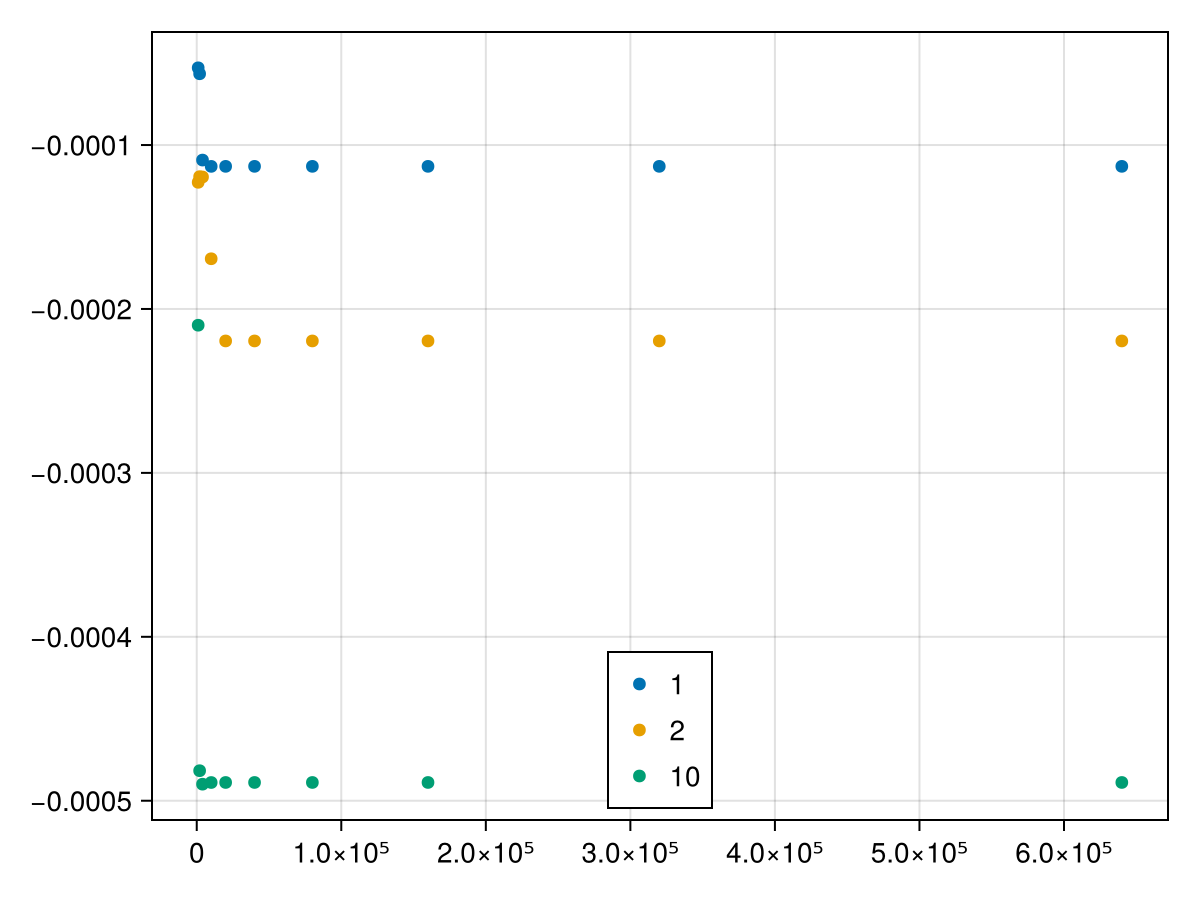

In [208]:
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/ABCNlayer.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/k_abcobservables")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/HeavyFermion_Optics/src/HF_Optics.jl")
include("/Users/fernandopenaranda/Documents/Work/PostdocDonosti/Projects/rhombohedral_grapheneNlayer/lmc.jl")
evallist = [1000,2000,4000,10000,20000,40000, 80000, 160000, 320000, 640000]
Tlist = [1,2,10]
lmc_testf(T) = [magneto_conductivity(:x,:x,:x, Params5LG(p, ξ=1, μ = 3), T = T, evals = ev,
     Ω_contr = true, omm_contr = true, fermi_surface = false) for ev in evallist];
fig = Figure()
ax = Axis(fig[1,1])
for t in Tlist
     scatter!(ax, evallist, lmc_testf(t), label = "$(t)")
end
axislegend(position = :cb)
fig





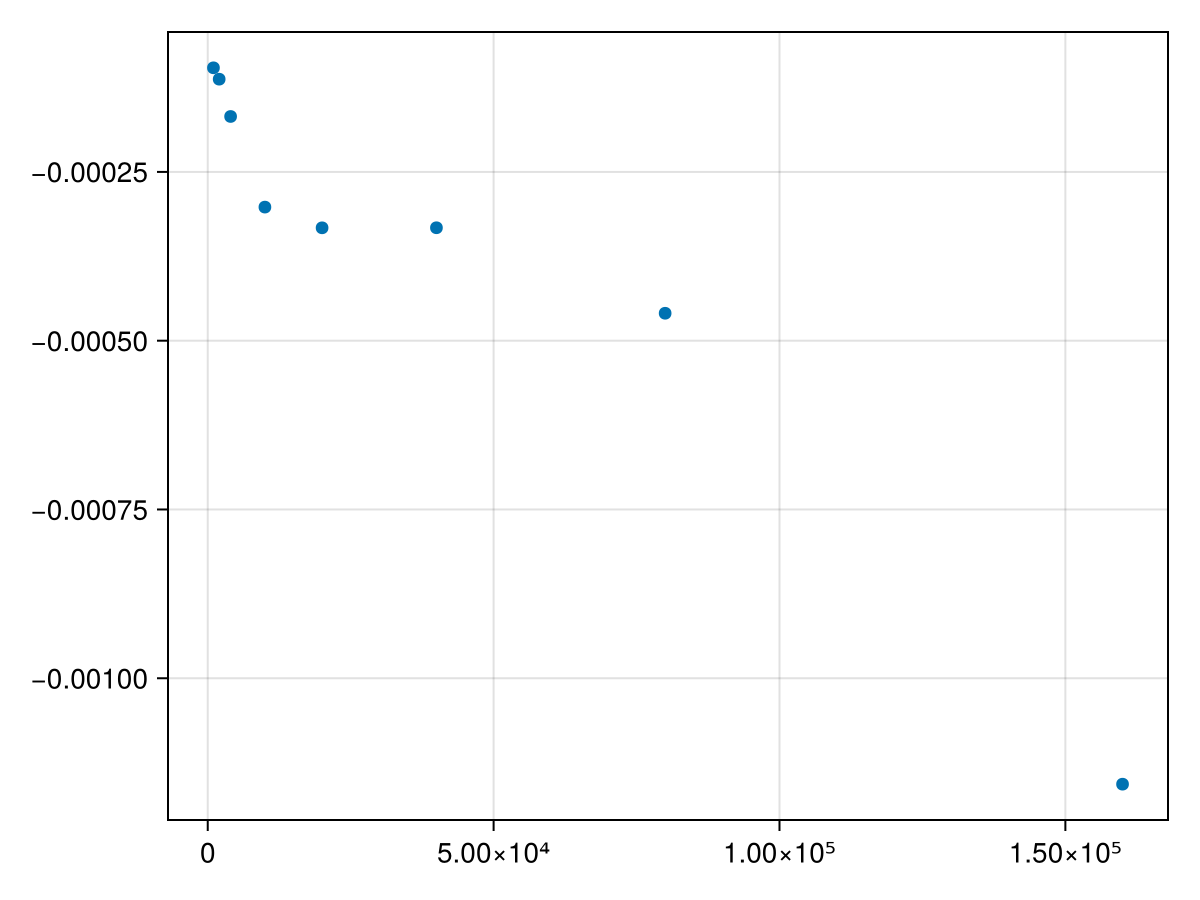

In [195]:
fig = Figure()
ax = Axis(fig[1,1])
scatter!(ax, evallist, lmc_test)
fig